# Social Web Project | Group 2
## Analysis of Gender-Based Hate Speech Towards Female Dutch Politicians in the Most Recent Dutch General Election
### by Moriah Owens, Christina Benopoulou, Tzortzina Gianni, and Isabelle Huguetto

### Part 1: Mastodon

Install Mastodon. If this doesn't work, try !pip3 instead of !pip.

In [1]:
!pip install mastodon.py


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


Establish connection to Mastodon below.
You will need to add your own client_id, client_secret, and access_token in order to run Mastodon requests.

In [2]:
from mastodon import Mastodon

API = Mastodon(
    client_id='AlXEFnh5_DcvCymjl5m9ds32jzY1unQ4l7wiHzuebEc', #Client key
    client_secret='hZlaUilk7K8xvTqYEI4YMiBmiWMhh-cooriVcSTjsRM', #Client secret
    access_token='bd8z8yczTMblqVw3gcW2yZXQGrxnUmFWwW_XW2qFpoI', #Your access token
    api_base_url='https://mastodon.social'  
)

me = API.account_verify_credentials()
print(me)
# If connection has been established correctly, your basic profile information will print below.

Account({'id': 115469282164664965, 'username': 'moriahowens', 'acct': 'moriahowens', 'display_name': '', 'discoverable': None, 'group': False, 'locked': False, 'created_at': datetime.datetime(2025, 10, 31, 0, 0, tzinfo=tzutc()), 'following_count': 0, 'followers_count': 0, 'statuses_count': 5, 'note': '', 'url': 'https://mastodon.social/@moriahowens', 'uri': 'https://mastodon.social/ap/users/115469282164664965', 'avatar': 'https://mastodon.social/avatars/original/missing.png', 'header': 'https://mastodon.social/headers/original/missing.png', 'avatar_static': 'https://mastodon.social/avatars/original/missing.png', 'header_static': 'https://mastodon.social/headers/original/missing.png', 'moved': None, 'suspended': None, 'limited': None, 'bot': False, 'fields': [], 'emojis': [], 'last_status_at': datetime.datetime(2025, 10, 31, 0, 0), 'noindex': False, 'roles': [], 'role': Role({'id': '-99', 'name': '', 'permissions': '65536', 'color': '', 'highlighted': False}), 'source': CredentialAccoun

The following cell exists solely for Jupyter Notebook debugging. I can run this cell to determine if the Kernel needs to be restarted.

In [3]:
1+1

2

This block gets all toots on Mastodon that contain the phrase "Dutch election" (or related phases/hashtags) and were created in 2025. It stores the text content of these toots in a list called "toots".

In [4]:
query = "Dutch election"
toots = []
max_toots = 1000

# Page 1
results = API.search_v2(query)
statuses = results.get("statuses", [])

for s in statuses:
    content = s.get("content", "")
    timestamp = s.get("created_at")

    if timestamp:
        text = content.lower()
        match_phrase1 = "dutch election" in text
        match_phrase2 = "netherlands election" in text
        match_phrase3 = "election in the netherlands" in text
        match_phrase4 = "election in netherlands" in text
        match_phrase5 = "dutch general election" in text
        match_phrase6 = "netherlands general election" in text
        match_hashtag1 = "#dutchelection" in text
        match_hashtag2 = "#netherlandselection" in text
    
    if (match_phrase1 or match_phrase2 or match_phrase3 or match_phrase4 or match_phrase5 or match_phrase6 or match_hashtag1 or match_hashtag2) and timestamp.year == 2025:
        toots.append(content)

print("First page returned", len(statuses), "statuses")

# Next Page(s) if they exist
# search_v2 returns something like results["statuses"][...]["id"]
while len(toots) < max_toots and len(statuses) > 0:
    print("Next page returned", len(statuses), "statuses")
    last_id = statuses[-1]["id"]

    results = API.search_v2(query, max_id=last_id)
    statuses = results.get("statuses", [])

    if not statuses:
        break

    for s in statuses:
        content = s.get("content", "")
        timestamp = s.get("created_at")
        
        if timestamp:
            text = content.lower()
            match_phrase1 = "dutch election" in text
            match_phrase2 = "netherlands election" in text
            match_phrase3 = "election in the netherlands" in text
            match_phrase4 = "election in netherlands" in text
            match_phrase5 = "dutch general election" in text
            match_phrase6 = "netherlands general election" in text
            match_hashtag1 = "#dutchelection" in text
            match_hashtag2 = "#netherlandselection" in text
    
        if (match_phrase1 or match_phrase2 or match_phrase3 or match_phrase4 or match_phrase5 or match_phrase6 or match_hashtag1 or match_hashtag2) and timestamp.year == 2025:
            toots.append(content)


    if timestamp.year < 2025:
        break

        """
        if len(toots) >= max_toots:
            break
        """
for i, t in enumerate(toots[:20]):
    print(t)

First page returned 18 statuses
Next page returned 18 statuses
Next page returned 18 statuses
Next page returned 20 statuses
Next page returned 18 statuses
Next page returned 13 statuses
Next page returned 16 statuses
Next page returned 16 statuses
Next page returned 20 statuses
Next page returned 15 statuses
Next page returned 16 statuses
Next page returned 18 statuses
Next page returned 18 statuses
Next page returned 17 statuses
Next page returned 18 statuses
Next page returned 20 statuses
Next page returned 19 statuses
Next page returned 19 statuses
Next page returned 19 statuses
Next page returned 18 statuses
Next page returned 17 statuses
Next page returned 20 statuses
Next page returned 17 statuses
Next page returned 16 statuses
Next page returned 14 statuses
Next page returned 17 statuses
Next page returned 16 statuses
Next page returned 15 statuses
Next page returned 15 statuses
Next page returned 16 statuses
Next page returned 16 statuses
Next page returned 18 statuses
Next pa

In [5]:
# This is how many toots have been created in 2025 in English about the Dutch general election.
print(len(toots))

270


This block does the same, but for toots in Dutch, storing them in the list "dutchtoots"

In [6]:
dutchquery = "nederlandse verkiezingen"
dutchtoots = []
max_toots = 1000

# Page 1
dutchresults = API.search_v2(dutchquery)
dutchstatuses = dutchresults.get("statuses", [])

for s in dutchstatuses:
    content = s.get("content", "")
    timestamp = s.get("created_at")

    if timestamp:
        text = content.lower()
        match_phrase7 = "nederlandse verkiezingen" in text
        match_phrase8 = "nederlandse algemene verkiezingen" in text
        match_phrase9 = "verkiezingen in Nederland" in text
        match_hashtag3 = "#nederlandseverkiezingen" in text
        match_hashtag4 = "#nederlandsealgemeneverkiezingen" in text

    
    if (match_phrase7 or match_phrase8 or match_phrase9 or match_hashtag3 or match_hashtag4) and timestamp.year == 2025:
        dutchtoots.append(content)

print("First page returned", len(dutchstatuses), "statuses")

# Next Page(s) if they exist
# search_v2 returns something like results["statuses"][...]["id"]
while len(dutchtoots) < max_toots and len(dutchstatuses) > 0:
    print("Next page returned", len(dutchstatuses), "statuses")
    last_id = dutchstatuses[-1]["id"]

    dutchresults = API.search_v2(dutchquery, max_id=last_id)
    dutchstatuses = dutchresults.get("statuses", [])

    if not dutchstatuses:
        break

    for s in dutchstatuses:
        content = s.get("content", "")
        timestamp = s.get("created_at")
        
        if timestamp:
            text = content.lower()
            match_phrase7 = "nederlandse verkiezingen" in text
            match_phrase8 = "nederlandse algemene verkiezingen" in text
            match_phrase9 = "verkiezingen in Nederland" in text
            match_hashtag3 = "#nederlandseverkiezingen" in text
            match_hashtag4 = "#nederlandsealgemeneverkiezingen" in text
    
        if (match_phrase7 or match_phrase8 or match_phrase9 or match_hashtag3 or match_hashtag4) and timestamp.year == 2025:
            dutchtoots.append(content)


    if timestamp.year < 2025:
        break

        """
        if len(toots) >= max_toots:
            break
        """
for i, t in enumerate(dutchtoots[:20]):
    print(t)

First page returned 19 statuses
Next page returned 19 statuses
Next page returned 19 statuses
Next page returned 20 statuses
<p>📰 Zo probeerden nepaccounts de Nederlandse verkiezingen te beïnvloeden</p><p><a href="https://nieuwsjunkies.nl/artikel/1oGC" target="_blank" rel="nofollow noopener" translate="no"><span class="invisible">https://</span><span class="">nieuwsjunkies.nl/artikel/1oGC</span><span class="invisible"></span></a></p><p>🕗 20:12 | RTL Nieuws<br />🔸 <a href="https://mastodon.social/tags/Verkiezingen" class="mention hashtag" rel="tag">#<span>Verkiezingen</span></a> <a href="https://mastodon.social/tags/Polarisatie" class="mention hashtag" rel="tag">#<span>Polarisatie</span></a> <a href="https://mastodon.social/tags/Fraude" class="mention hashtag" rel="tag">#<span>Fraude</span></a> <a href="https://mastodon.social/tags/Nigeria" class="mention hashtag" rel="tag">#<span>Nigeria</span></a> <a href="https://mastodon.social/tags/Twitter" class="mention hashtag" rel="tag">#<span>

In [7]:
# This is how many toots have been created in 2025 in Dutch about the Dutch general election.
print(len(dutchtoots))

14


This block filters the toots we gathered, picking out the toots that reference one of the 64 House of Representatives members that are female.

In [8]:
totalelectiontoots = toots + dutchtoots

# List of the last names of all female politicians in the House of Representatives
# First name is included where there are multiple politicians with the same last name
# This will be used to gather instances of references to these politicians
female_politicians = ["Abdi", "van Ark", "Armut", "Becker", "Beckerman", "Belhirch", "van Berkel", "Biekman", "Bikker", "Boelsma-Hoekstra", "van Brenk", "Bromet", "Buhler", "Coenradie", "Heera Dijk", "Inge van Dijk", "Dobbe", "van Eijk", "El Boujdaini", "den Hollander", "ten Hove", "Huizenga", "Kathmann", "Keijzer", "Kostic", "Kroger", "Lahlah", "Lammers", "Maeijer", "Martens-America", "van Meetelen", "Michon-Derkzen", "Moinat", "Moorman", "Mutluer", "Oosterhout", "Oualhadj", "Ouwehand", "Patijn", "Paulusma", "Piri", "van der Plas", "Podt", "Raijer", "Rajkowski", "Rooderkerk", "Schilder", "Steen", "Straatman", "Synhaeve", "Teunissen", "Tijmstra", "Tseggai", "Vellinga-Beemsterboer", "Vliegenthart", "Vondeling", "de Vos", "Wendel", "van der Werf", "Westerveld", "Wiersma", "Yesilgoz-Zegerius", "Zalinyan", "Zwinkels"]

electiontootsaboutwomen = []

for t in totalelectiontoots:
    # Does the toot contain a reference to a female politician?
    fem_ref = 0
    for f in female_politicians:
        if f in t:
            fem_ref = 1
    if fem_ref == 1:
        electiontootsaboutwomen.append(t)

print(len(electiontootsaboutwomen))

2


There are only 2 toots that reference Dutch female politicians in the toots that we gathered. 

This is an indication that either:
1. There is simply not enough data available on Mastodon
2. Our method of data collection is too narrowing, and we need to go about it a different way

We can continue by attempting to search for toots by the name of the politician first, since any toots that reference the first and last name of any of these politicians (in the year 2025) are extremely likely to be talking about Dutch elections.

In [9]:
female_pol_firstlast = ["Fatihya Abdi", "Elles van Ark", "Etkin Armut", "Bente Becker", "Sandra Beckerman", "Fatimazhra Belhirch", "Nathalie van Berkel", "Anouschka Biekman", "Mirjam Bikker", "Lucienne Boelsma-Hoekstra", "Corrie van Brenk", "Laura Bromet", "Judith Buhler", "Ingrid Coenradie", "Heera Dijk", "Inge van Dijk", "Sarah Dobbe", "Wendy van Eijk", "Sarah El Boujdaini", "Renate den Hollander", "Tamara ten Hove", "Renilde Huizenga", "Barbara Kathmann", "Mona Keijzer", "Ines Kostic", "Suzanne Kroger", "Esmah Lahlah", "Annelotte Lammers", "Vicky Maeijer", "Claire Martens-America", "Rachel van Meetelen", "Ingrid Michon-Derkzen", "Nicole Moinat", "Marjolein Moorman", "Songul Mutluer", "Annabel Nanninga", "Sjoukje van Oosterhout", "Ouafa Oualhadj", "Esther Ouwehand", "Mariette Patijn", "Wieke Paulusma", "Kati Piri", "Caroline van der Plas", "Anne-Marijke Podt", "Annette Raijer", "Queeny Rajkowski", "Ilana Rooderkerk", "Shanna Schilder", "Hanneke Steen", "Jeltje Straatman", "Marijke Synhaeve", "Christine Teunissen", "Eveline Tijmstra", "Mikal Tseggai", "Marieke Vellinga-Beemsterboer", "Lisa Vliegenthart", "Marina Vondeling", "Lidewij de Vos", "Hilde Wendel", "Hanneke van der Werf", "Lisa Westerveld", "Femke Wiersma", "Dilan Yesilgoz-Zegerius", "Ani Zalinyan", "Jantine Zwinkels"]
print(len(female_pol_firstlast))

65


In [10]:
name_toots = []

# Page 1
for name in female_pol_firstlast:
    print("Searching for ", name)
    results = API.search_v2(name)
    statuses = results.get("statuses", [])

    for s in statuses:
        content = s.get("content", "")
        timestamp = s.get("created_at")
        if timestamp.year == 2025:
            name_toots.append({
                "text": content,
                "politician": name,
                "hate_speech": False,
                "hate_categories": []
            })


    print("First page returned", len(statuses), "statuses")

    # Next Page(s) if they exist
    # search_v2 returns something like results["statuses"][...]["id"]
    prev_last_id = None
    while len(statuses) > 0:
        print("Next page returned", len(statuses), "statuses")

        last_id = int(statuses[-1]["id"])
        if last_id == prev_last_id:
            print("Pagination stuck, breaking.")
            break
        prev_last_id = last_id

        results = API.search_v2(name, max_id=str(last_id - 1))
        statuses = results.get("statuses", [])

        if not statuses:
            break

        for s in statuses:
            content = s.get("content", "")
            timestamp = s.get("created_at")
            if timestamp.year == 2025:
                name_toots.append({
                    "text": content,
                    "politician": name,
                    "hate_speech": False,
                    "hate_categories": []
                })


        if timestamp.year < 2025:
            break

Searching for  Fatihya Abdi
First page returned 4 statuses
Next page returned 4 statuses
Searching for  Elles van Ark
First page returned 3 statuses
Next page returned 3 statuses
Searching for  Etkin Armut
First page returned 1 statuses
Next page returned 1 statuses
Next page returned 1 statuses
Pagination stuck, breaking.
Searching for  Bente Becker
First page returned 20 statuses
Next page returned 20 statuses
Searching for  Sandra Beckerman
First page returned 19 statuses
Next page returned 19 statuses
Searching for  Fatimazhra Belhirch
First page returned 2 statuses
Next page returned 2 statuses
Next page returned 1 statuses
Pagination stuck, breaking.
Searching for  Nathalie van Berkel
First page returned 6 statuses
Next page returned 6 statuses
Next page returned 1 statuses
Pagination stuck, breaking.
Searching for  Anouschka Biekman
First page returned 0 statuses
Searching for  Mirjam Bikker
First page returned 20 statuses
Next page returned 20 statuses
Searching for  Lucienne B

Since we now have enough toots, we can analyze them for hate speech. The following code is adapted from the Bluesky file.

In [11]:
import re

In [12]:
hate_keywords = {
    'sexist': [
        # English
        'bitch', 'slut', 'whore', 'feminazi', 'should be home', 'kitchen', 
        'belong in kitchen', 'stay home', 'not fit for', 'too emotional',
        'hormonal', 'on her period', 'typical woman', 'like all women',
        'gold digger', 'sleeping her way', 'token woman', 'diversity hire',
        # Dutch
        'hoer', 'slet', 'teef', 'wijf', 'kutwijf', 'trut', 'tuthola',
        'blijf thuis', 'thuishoren', 'keuken', 'niet geschikt',
        'typisch vrouw', 'als alle vrouwen', 'emancipatiehoer'
    ],
    
    'appearance': [
        # English
        'ugly', 'fat', 'old', 'haggard', 'looks like', 'hideous', 'disgusting',
        'needs makeup', 'aging', 'wrinkled', 'unattractive', 'gross', 'obese',
        'pig', 'cow', 'dog', 'horse face', 'too old', 'past her prime',
        'should dress better', 'unfuckable', 'butter face',
        # Dutch
        'lelijk', 'dik', 'oud', 'afgetakeld', 'ziet eruit als', 'goor',
        'walgelijk', 'smerig', 'varken', 'koe', 'hond', 'te oud', 
        'ouwe taart', 'opgespoten', 'plastisch'
    ],
    
    'threats': [
        # English
        'kill', 'rape', 'assault', 'death threat', 'should die', 'hope you die',
        'deserve to die', 'hang', 'shoot', 'stab', 'murder', 'assassinate',
        'violence', 'hurt', 'beat', 'attack', 'lynch', 'burn',
        'going to get', 'coming for you', 'watch your back', 'better watch out',
        # Dutch
        'dood', 'verkracht', 'vermoord', 'doodgeschoten', 'opgehangen',
        'gestoken', 'aanval', 'geweld', 'pijn doen', 'slaan', 'pak op je',
        'krijg je', 'komt ervan', 'kijk maar uit', 'pas maar op'
    ],
    
    'misogyny': [
        # English
        'stupid woman', 'dumb female', 'emotional', 'hysterical', 'irrational',
        'cant think', 'no brain', 'empty head', 'airhead', 'bimbo', 'ditzy',
        'woman logic', 'female brain', 'overly sensitive', 'dramatic',
        'attention seeker', 'attention whore', 'playing victim', 'victim card',
        'women are', 'females are', 'all women', 'typical female',
        # Dutch
        'domme vrouw', 'stomme wijf', 'emotioneel', 'hysterisch', 'irrationeel',
        'geen hersens', 'leeg hoofd', 'dom blondje', 'vrouwenlogica',
        'typisch vrouwelijk', 'aandachtshoer', 'slachtoffer spelen',
        'vrouwen zijn', 'alle vrouwen', 'wijven zijn'
    ],
    
    'objectification': [
        # English
        'hot', 'sexy', 'body', 'breasts', 'legs', 'ass', 'boobs', 'tits',
        'would bang', 'would smash', 'milf', 'piece of ass', 'nice rack',
        'fuckable', 'bangable', 'doable', 'eye candy', 'arm candy',
        'prostitute', 'escort', 'stripper', 'pornstar',
        # Dutch
        'lekker', 'geil', 'lichaam', 'borsten', 'tieten', 'kont', 'benen',
        'neuken', 'pikken', 'pijpen', 'hoer', 'prostituee', 'slet',
        'hoerig', 'sletterig', 'goedkoop'
    ],
    
    'competence_undermining': [
        # English
        'unqualified', 'incompetent', 'clueless', 'has no idea', 'doesnt know',
        'out of her depth', 'in over her head', 'puppet', 'controlled by',
        'token', 'quota', 'affirmative action', 'only there because',
        'diversity', 'check box', 'not earned', 'handed to her',
        # Dutch
        'onbekwaam', 'incompetent', 'geen idee', 'weet niet', 'snapt niet',
        'marionet', 'pop', 'aangestuurd door', 'quotum', 'alleen maar omdat',
        'diversiteit', 'niet verdiend', 'cadeau gekregen'
    ],
    
    'dismissive': [
        # English
        'shut up', 'nobody cares', 'who cares', 'go away', 'disappear',
        'resign', 'step down', 'quit', 'get out', 'fuck off', 'piss off',
        'go back to', 'return to', 'not welcome', 'dont belong',
        # Dutch
        'kop dicht', 'hou je bek', 'bek houden', 'niemand interesseert',
        'boeit niet', 'rot op', 'oprotten', 'wegwezen', 'ga weg',
        'opzouten', 'opdonderen', 'aftreden', 'opstappen', 'ga terug naar',
        'niet welkom', 'hoort hier niet'
    ],
    
    'ethnic_religious_slurs': [
        # English (relevant to Dutch political context)
        'muslim', 'immigrant', 'foreign', 'terrorist', 'go back', 'not dutch',
        'invasion', 'replacement', 'traitor', 'islam lover', 'multiculti',
        # Dutch
        'moslim', 'allochtoon', 'buitenlander', 'terrorist', 'ga terug',
        'niet nederlands', 'invasie', 'vervanging', 'landverraad', 'verrader',
        'islamliefhebber', 'gutmensch', 'linkse rat'
    ]
}
for post in name_toots:
    text_lower = post["text"].lower()
    post['hate_speech'] = False
    post['hate_categories'] = []

    for category, keywords in hate_keywords.items():
        for kw in keywords:
            kw_escaped = re.escape(kw)

            pattern = r'\b' + kw_escaped + r'\b'

            if re.search(pattern, text_lower):
                post['hate_speech'] = True
                post['hate_categories'].append(category)
                break


total = len(name_toots)
hate_count = len([p for p in name_toots if p['hate_speech']])

print(f"Total posts: {total}")
print(f"Posts with potential hate speech: {hate_count} ({hate_count/total*100:.1f}%)")
print(f"\nBreakdown by category:")

for category in hate_keywords.keys():
    count = len([p for p in name_toots if category in p.get('hate_categories', [])])
    print(f"  - {category}: {count}")


Total posts: 1374
Posts with potential hate speech: 104 (7.6%)

Breakdown by category:
  - sexist: 8
  - appearance: 29
  - threats: 44
  - misogyny: 4
  - objectification: 17
  - competence_undermining: 7
  - dismissive: 6
  - ethnic_religious_slurs: 5


Next, we will do the same process with the male politicians, so that we can compare results.

In [13]:
male_pols = ["Thierry Aartsen", "Ismail el Abassi", "Robert van Asten", "Stephan van Baarle", "Mpanzu Bamenga", "Thierry Baudet", "Daniel van den Berg", "Harry Bevers", "Henri Botenbal", "Diederik Boomsma", "Maikel Boon", "Martin Bosma", "Derk Boswijk", "Ruben Brekelmans", "Tijs van den Brink", "Bart van den Brink", "Eric van der Burg", "Julian Bushoff", "Thom van Campen", "Don Ceder", "Simon Ceulemans", "Rene Claassen", "Ranjith Clemminck", "Laurens Dassen", "Ralk Dekker", "Tony van Dijck", "Jimmy Dijk", "Emiel van Dijk", "Diederik van Dijk", "Peter van Duijvenvoorde", "Joost Eerdmans", "Ulysse Ellian", "Dogukan Ergin", "Silvio Erkens", "Marjolein Faber", "Andre Flach", "Maarten Goudzwaard", "Dion Graus", "Pieter Grinwis", "Peter de Groot", "Sarath Hamstra", "Eelco Heinen", "Hidde Heutink", "Michiel Hoogeveen", "Habtamu de Hoop", "Pepijn van Houwelingen", "Dion Huidekooper", "Frederik Jansen", "Chris Jansen", "Rob Jetten", "Henk Jumelet", "Vincent Karremans", "Arend Kisteman", "Jesse Klaver", "Felix Klos", "Jan Arie Koorevaar", "Alexander Kops", "Daan de Kort", "Ulas Kose", "Harmen Krul", "Maes van Lanschot", "Tom van der Lee", "Gidi Markuszower", "Gideon van Meijeren", "Mohammed Mohandis", "Jeremy Mooiman", "Edgar Mulder", "Stephen Neijenhuis", "Jurgen Nobel", "Henk-Jan Oosterhuis", "Jan Paternotte", "Erwin Prickaertz", "Raymond de Roon", "Jan Schoonis", "Bjorn Schutz", "Joost Sneller", "Chris Stoffer", "Sebastiaan Stoteler", "Jan Struijs", "Luc Stultiens", "Henk Vermeer", "Marc Vervuurt", "Hans Vijlbrief", "Elmar Vlottes", "Geert Wilders"]
print(len(male_pols))

85


In [14]:
malepol_toots = []

# Page 1
for name in male_pols:
    print("Searching for ", name)
    results = API.search_v2(name)
    statuses = results.get("statuses", [])

    for s in statuses:
        content = s.get("content", "")
        timestamp = s.get("created_at")
        if timestamp.year == 2025:
            malepol_toots.append({
                "text": content,
                "politician": name,
                "hate_speech": False,
                "hate_categories": []
            })


    print("First page returned", len(statuses), "statuses")

    # Next Page(s) if they exist
    # search_v2 returns something like results["statuses"][...]["id"]
    prev_last_id = None
    while len(statuses) > 0:
        print("Next page returned", len(statuses), "statuses")

        last_id = int(statuses[-1]["id"])
        if last_id == prev_last_id:
            print("Pagination stuck, breaking.")
            break
        prev_last_id = last_id

        results = API.search_v2(name, max_id=str(last_id - 1))
        statuses = results.get("statuses", [])

        if not statuses:
            break

        for s in statuses:
            content = s.get("content", "")
            timestamp = s.get("created_at")
            if timestamp.year == 2025:
                malepol_toots.append({
                    "text": content,
                    "politician": name,
                    "hate_speech": False,
                    "hate_categories": []
                })


        if timestamp.year < 2025:
            break

Searching for  Thierry Aartsen
First page returned 20 statuses
Next page returned 20 statuses
Searching for  Ismail el Abassi
First page returned 7 statuses
Next page returned 7 statuses
Searching for  Robert van Asten
First page returned 0 statuses
Searching for  Stephan van Baarle
First page returned 19 statuses
Next page returned 19 statuses
Searching for  Mpanzu Bamenga
First page returned 3 statuses
Next page returned 3 statuses
Searching for  Thierry Baudet
First page returned 19 statuses
Next page returned 19 statuses
Next page returned 16 statuses
Next page returned 20 statuses
Next page returned 14 statuses
Searching for  Daniel van den Berg
First page returned 12 statuses
Next page returned 12 statuses
Searching for  Harry Bevers
First page returned 1 statuses
Next page returned 1 statuses
Next page returned 1 statuses
Pagination stuck, breaking.
Searching for  Henri Botenbal
First page returned 0 statuses
Searching for  Diederik Boomsma
First page returned 20 statuses
Next p

In [15]:
for post in malepol_toots:
    text_lower = post["text"].lower()
    post['hate_speech'] = False
    post['hate_categories'] = []
    
    for category, keywords in hate_keywords.items():
        for kw in keywords:
            kw_escaped = re.escape(kw)

            pattern = r'\b' + kw_escaped + r'\b'

            if re.search(pattern, text_lower):
                post['hate_speech'] = True
                post['hate_categories'].append(category)
                break


total = len(malepol_toots)
hate_count = len([p for p in malepol_toots if p['hate_speech']])

print(f"Total posts: {total}")
print(f"Posts with potential hate speech: {hate_count} ({hate_count/total*100:.1f}%)")
print(f"\nBreakdown by category:")

for category in hate_keywords.keys():
    count = len([p for p in malepol_toots if category in p.get('hate_categories', [])])
    print(f"  - {category}: {count}")

Total posts: 3933
Posts with potential hate speech: 276 (7.0%)

Breakdown by category:
  - sexist: 10
  - appearance: 73
  - threats: 98
  - misogyny: 3
  - objectification: 30
  - competence_undermining: 36
  - dismissive: 23
  - ethnic_religious_slurs: 28


Geert Wilders, as a very controversial figure, may be skewing the data significantly. Let's perform the same analysis for all the male politicians except Wilders.

In [16]:
minus_wilders = []
for post in malepol_toots:
    if post["politician"] != "Geert Wilders":
        minus_wilders.append(post)

for post in minus_wilders:import matplotlib.pyplot as plt
    text_lower = post["text"].lower()
    post['hate_speech'] = False
    post['hate_categories'] = []
    
    for category, keywords in hate_keywords.items():
        for kw in keywords:
            kw_escaped = re.escape(kw)

            pattern = r'\b' + kw_escaped + r'\b'

            if re.search(pattern, text_lower):
                post['hate_speech'] = True
                post['hate_categories'].append(category)
                break


total = len(minus_wilders)
hate_count = len([p for p in minus_wilders if p['hate_speech']])

print(f"Total posts: {total}")
print(f"Posts with potential hate speech: {hate_count} ({hate_count/total*100:.1f}%)")
print(f"\nBreakdown by category:")

for category in hate_keywords.keys():
    count = len([p for p in minus_wilders if category in p.get('hate_categories', [])])
    print(f"  - {category}: {count}")

IndentationError: unexpected indent (695106623.py, line 7)

Set up pandas and get aggregate values.

In [ ]:
!pip install pandas

In [41]:
import pandas as pd

In [ ]:
dataframe = pd.DataFrame(name_toots)

agg = dataframe.groupby("politician").agg(
    total_toots = ("text", "count"),
    hate_toots  = ("hate_speech", "sum")
)

agg["non_hate_toots"] = agg["total_toots"] - agg["hate_toots"]

Create bar chart for female politician, displaying total toots against total toots containing hate speech.

In [ ]:
!pip install matplotlib

In [43]:
import matplotlib.pyplot as plt

In [44]:
ax = agg[["non_hate_toots", "hate_toots"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

ax.legend(["Not Containing Hate Speech", "Containing Hate Speech"])

# Percentage labels above each bar
for i, (non_hate, hate) in enumerate(zip(agg['non_hate_toots'], agg['hate_toots'])):
    total = non_hate + hate
    if total > 0:
        pct = hate / total * 100
        if pct > 0.0:
            ax.text(
                i,
                total + 2,
                f"{pct:.1f}%",
                ha='center', va='bottom', fontsize=8, rotation=0
            )

ax.set_xlabel("Politician")
ax.set_ylabel("Number of toots")
ax.set_title("Total Toots per Female Politician (with Hate Speech Subset)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

KeyError: "None of [Index(['non_hate_toots', 'hate_toots'], dtype='object')] are in the [columns]"

Next, do the same for male politicians.

In [ ]:
dataframe = pd.DataFrame(malepol_toots)

agg = dataframe.groupby("politician").agg(
    total_toots = ("text", "count"),
    hate_toots  = ("hate_speech", "sum")
)

agg["non_hate_toots"] = agg["total_toots"] - agg["hate_toots"]

## This line removes all politicians from the graph that did not have any toots gathered about them. 
## Doing so means that the graph does not have EVERY male politician in it, but also makes it less cluttered by removing irrelevant names.
## Comment out the line below to have every male politician reflected.
agg = agg[(agg["total_toots"] > 0) & (~agg["total_toots"].isna())]

ax = agg[["non_hate_toots", "hate_toots"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

ax.legend(["Not Containing Hate Speech", "Containing Hate Speech"])

# Percentage labels above each bar
for i, (non_hate, hate) in enumerate(zip(agg['non_hate_toots'], agg['hate_toots'])):
    total = non_hate + hate
    if total > 0:
        pct = hate / total * 100
        if pct > 0.0:
            ax.text(
                i,
                total + 2,
                f"{pct:.1f}%",
                ha='center', va='bottom', fontsize=8, rotation=0
            )

ax.set_xlabel("Politician")
ax.set_ylabel("Number of toots")
ax.set_title("Total Toots per Male Politician (with Hate Speech Subset)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

We can see here that even though we had assumed Geert Wilders might be an outlier, he does not have an above normal percentage of hate speech in his mentions, and many male politicians even have more hate speech in their content.

Next, we can visualize the percentages of toots with each kind of hate speech for female politicians using pie charts.

In [ ]:
category_counts = {
    category: len([p for p in name_toots if category in p.get('hate_categories', [])])
    for category in hate_keywords.keys()
}

total_posts = len(name_toots)

colors = ["#1f77b4", "#ff7f0e"]   # [non-hate, hate]

pretty_labels = {
    "sexist": "Sexism",
    "appearance": "Appearance-Related",
    "threats": "Threats",
    "misogyny": "Misogyny",
    "objectification": "Objectification",
    "competence_undermining": "Competence-Undermining",
    "dismissive": "Dismissive",
    "ethnic_religious_slurs": "Ethnic or Religious Slurs"
}

fig, axes = plt.subplots(2, 4, figsize=(18, 9))
axes = axes.flatten()

for i, (category, count) in enumerate(category_counts.items()):
    ax = axes[i]

    hate_pct = (count / total_posts) * 100 if total_posts > 0 else 0
    sizes = [total_posts - count, count]

    ax.pie(
        sizes,
        colors=colors,
        autopct=lambda pct: f"{pct:.1f}%" if pct > 0 else "",
        startangle=90,
        textprops={'fontsize': 8}
    )

    ax.set_title(f"{pretty_labels[category]}\n({hate_pct:.1f}% of all toots)", fontsize=10)

plt.tight_layout()
plt.show()

And we can do the same for male politicians.

In [ ]:
category_counts = {
    category: len([p for p in malepol_toots if category in p.get('hate_categories', [])])
    for category in hate_keywords.keys()
}

total_posts = len(name_toots)

colors = ["#1f77b4", "#ff7f0e"]   # [non-hate, hate]

pretty_labels = {
    "sexist": "Sexism",
    "appearance": "Appearance-Related",
    "threats": "Threats",
    "misogyny": "Misogyny",
    "objectification": "Objectification",
    "competence_undermining": "Competence-Undermining",
    "dismissive": "Dismissive",
    "ethnic_religious_slurs": "Ethnic or Religious Slurs"
}

fig, axes = plt.subplots(2, 4, figsize=(18, 9))
axes = axes.flatten()

for i, (category, count) in enumerate(category_counts.items()):
    ax = axes[i]

    hate_pct = (count / total_posts) * 100 if total_posts > 0 else 0
    sizes = [total_posts - count, count]

    ax.pie(
        sizes,
        colors=colors,
        autopct=lambda pct: f"{pct:.1f}%" if pct > 0 else "",
        startangle=90,
        textprops={'fontsize': 8}
    )

    ax.set_title(f"{pretty_labels[category]}\n({hate_pct:.1f}% of all toots)", fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Showing we have a lot more data for male politicians than female politicians.
print(len(malepol_toots))
print(len(name_toots))

We will continue by making more expressive plots that compare male and female politicians directly in the same plot.

In [21]:
import numpy as np

In [ ]:
blue = '#1f77b4'
orange = '#ff7f0e'

categories = list(hate_keywords.keys())

female_counts = {
    cat: len([p for p in name_toots if cat in p.get('hate_categories', [])])
    for cat in categories
}
female_total = len(name_toots)

male_counts = {
    cat: len([p for p in malepol_toots if cat in p.get('hate_categories', [])])
    for cat in categories
}
male_total = len(malepol_toots)

female_pct = {cat: female_counts[cat] / female_total * 100 for cat in categories}
male_pct   = {cat: male_counts[cat] / male_total   * 100 for cat in categories}

First is a simple side-by-side bar chart.

In [ ]:
x = np.arange(len(categories))
width = 0.35

female_vals = [female_pct[c] for c in categories]
male_vals   = [male_pct[c] for c in categories]

fig, ax = plt.subplots(figsize=(14, 6))

bars_f = ax.bar(x - width/2, female_vals, width, label="Female", color=orange)
bars_m = ax.bar(x + width/2, male_vals, width, label="Male", color=blue)

ax.set_xticks(x)
ax.set_xticklabels([pretty_labels[c] for c in categories], rotation=45, ha='right')
ax.set_ylabel("Percent of Toots Containing Hate Speech (%)")
ax.set_title("Hate Speech by Category: Female vs Male Politicians")
ax.legend()

# Add Percentage Labels
for bar in bars_f:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=9
    )

for bar in bars_m:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

Next is a normalized bar chart, so we can see which categories of hate speech affect males versus females more.

In [ ]:
categories = list(hate_keywords.keys())

female_counts = {
    c: sum(c in p['hate_categories'] for p in name_toots)
    for c in categories
}
male_counts = {
    c: sum(c in p['hate_categories'] for p in malepol_toots)
    for c in categories
}

female_total = sum(female_counts.values())
male_total   = sum(male_counts.values())

female_pct = {c: (female_counts[c] / female_total * 100 if female_total else 0)
              for c in categories}
male_pct   = {c: (male_counts[c] / male_total * 100 if male_total else 0)
              for c in categories}

colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

fig, ax = plt.subplots(figsize=(10, 6))

bottom_f = 0
bottom_m = 0

for i, c in enumerate(categories):
    f_val = female_pct[c]
    m_val = male_pct[c]

    ax.bar("Female", f_val, bottom=bottom_f, color=colors[i])
    ax.bar("Male",   m_val, bottom=bottom_m, color=colors[i])

    if f_val > 1:
        ax.text(
            "Female",
            bottom_f + f_val / 2,
            f"{f_val:.1f}%",
            ha="center", va="center", fontsize=9, color="white", fontweight="bold"
        )
    if m_val > 1:
        ax.text(
            "Male",
            bottom_m + m_val / 2,
            f"{m_val:.1f}%",
            ha="center", va="center", fontsize=9, color="white", fontweight="bold"
        )

    bottom_f += f_val
    bottom_m += m_val

ax.set_ylabel("Category Share (%)")
ax.set_title("Distribution of Hate Speech Categories (Normalized)")

legend_patches = [
    plt.matplotlib.patches.Patch(color=colors[i], label=pretty_labels[c])
    for i, c in enumerate(categories)
]
ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Last is a scatterplot that shows the total toots a politician has about them against the percentage of hate in their toots. We would expect this to show whether more infamous politicians (like Wilders) have more hate speech in their toots, and if this varies for males versus females.

In [ ]:
# Function to compute the hate rate of each politician
def compute_hate_rate(toots):
    poli_rates = {}
    for p in toots:
        pid = p["politician"]
        if pid not in poli_rates:
            poli_rates[pid] = {"total": 0, "hate": 0}
        poli_rates[pid]["total"] += 1
        if p["hate_speech"]:
            poli_rates[pid]["hate"] += 1

    return [
        (pid, data["total"], data["hate"] / data["total"] * 100)
        for pid, data in poli_rates.items()
        if data["total"] > 5  # filter tiny accounts
    ]

female_points = compute_hate_rate(name_toots)
male_points   = compute_hate_rate(malepol_toots)

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(
    [p[1] for p in female_points],
    [p[2] for p in female_points],
    color=orange,
    label="Female politicians",
    alpha=0.7
)

ax.scatter(
    [p[1] for p in male_points],
    [p[2] for p in male_points],
    color=blue,
    label="Male politicians",
    alpha=0.7
)

ax.set_xlabel("Total Toots")
ax.set_ylabel("Percent Hate (%)")
ax.set_title("Visibility vs Hate Level: Male vs Female Politicians")
ax.legend()

plt.tight_layout()
plt.show()

From this, we don't see any strong correlation, but we do see that in general, male politicians may be individually more devisive than female politicians.

Next, we will run statistical tests to determine whether the difference between hate speech towards male and female politicians is statistically significant.
First, we run a Two-Proportion Z-Test to determine if there is a statistically significant difference in % quantity of hate speech between male and female politicians overall, across all categories.
Then, we run the same Two-Proportional Z-Test for each category to determine if there are statistically significant differences there. For cases where the category contains less than 5 toots, we use a Fisher's Exact Test instead.

In [18]:
!pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/5f/a5/fcc4f5f16355660ce7a1742e28a43e3a9391b492fc4ff29fdd6893e81c05/statsmodels-0.14.5-cp312-cp312-macosx_10_13_x86_64.whl.metadata
  Obtaining dependency information for scipy!=1.9.2,>=1.8 from https://files.pythonhosted.org/packages/80/35/178d9d0c35394d5d5211bbff7ac4f2986c5488b59506fef9e1de13ea28d3/scipy-1.16.3-cp312-cp312-macosx_14_0_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.1 MB/s eta 0:00:0000:01
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/f1/70/ba4b949bdc0490ab78d545459acd7702b211dfccf7eb89bbc1060f52818d/patsy-1.0.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 15.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 4.9 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 12.7 MB/s eta 0:00:0

In [19]:
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import fisher_exact

In [28]:
# Step 1: Overall
female_total = len(name_toots)
female_hate = sum(1 for p in name_toots if p["hate_speech"])

male_total = len(malepol_toots)
male_hate = sum(1 for p in malepol_toots if p["hate_speech"])

# Two-proportion z-test
counts = np.array([female_hate, male_hate])
nobs = np.array([female_total, male_total])

zstat, p = proportions_ztest(count=counts, nobs=nobs)

print("z =", round(zstat, 5), ", p =", round(p, 5))

if p < 0.05:
    print("Significant difference\n")
else:
    print("Not significant\n")


# Step 2: Per Category

for category in hate_keywords.keys():
    female_cat = sum(1 for p in name_toots if category in p["hate_categories"])
    male_cat = sum(1 for p in malepol_toots if category in p["hate_categories"])

    f_total = female_total
    m_total = male_total

    contingency = np.array([[female_cat, f_total - female_cat], [male_cat,   m_total - male_cat]])

    # Fisher if any small category
    if female_cat < 5 or male_cat < 5:
        test_type = "Fisher"
        stat_value, pval = fisher_exact(contingency)
        print("Did fisher test for ", category)
        print("p value = ", pval)
        if pval < 0.05:
            print("Statistically significant difference for category ", category)
        else:
            print("No for ", category)
    else:
        count = np.array([female_cat, male_cat])
        nobs = np.array([f_total, m_total])
        test_type = "Z-test"
        stat_value, pval = proportions_ztest(count, nobs)
        print("Did z-test for ", category)
        print("p value = ", pval)
        if pval < 0.05:
            print("Statistically significant difference for category ", category)
        else:
            print("No for ", category)

z = 0.68268 , p = 0.49481
Not significant

Did z-test for  sexist
p value =  0.07183747018514798
No for  sexist
Did z-test for  appearance
p value =  0.5541265204012167
No for  appearance
Did z-test for  threats
p value =  0.15997821212146413
No for  threats
Did fisher test for  misogyny
p value =  0.07893191417799503
No for  misogyny
Did z-test for  objectification
p value =  0.10607741495167067
No for  objectification
Did z-test for  competence_undermining
p value =  0.14854459850955926
No for  competence_undermining
Did z-test for  dismissive
p value =  0.5214415875323544
No for  dismissive
Did z-test for  ethnic_religious_slurs
p value =  0.1577327079092702
No for  ethnic_religious_slurs


We find that, on Mastodon, there is no statistically significant difference between male and female politicians' reception of hate speech, overall or within any specific category.

Mastodon relevant variables for future reference:
- Female politician dictionaries: name_toots
- Male politician dictionaries: malepol_toots

### Part 2: Bluesky

In [30]:
!pip install atproto

  Obtaining dependency information for atproto from https://files.pythonhosted.org/packages/75/80/e3570230121cbc8b00549ee63a802ad2d3c0a35ecc5bb94af46924cdfad8/atproto-0.0.64-py3-none-any.whl.metadata
  Obtaining dependency information for click<9,>=8.1.3 from https://files.pythonhosted.org/packages/98/78/01c019cdb5d6498122777c1a43056ebb3ebfeef2076d9d026bfe15583b2b/click-8.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for cryptography<46,>=41.0.7 from https://files.pythonhosted.org/packages/0c/91/925c0ac74362172ae4516000fe877912e33b5983df735ff290c653de4913/cryptography-45.0.7-cp311-abi3-macosx_10_9_universal2.whl.metadata
  Obtaining dependency information for dnspython<3,>=2.4.0 from https://files.pythonhosted.org/packages/ba/5a/18ad964b0086c6e62e2e7500f7edc89e3faa45033c71c1893d34eed2b2de/dnspython-2.8.0-py3-none-any.whl.metadata
  Obtaining dependency information for libipld<4,>=3.0.1 from https://files.pythonhosted.org/packages/84/7d/126a167514ea55a0544253ddc2d7d30

In [31]:
from atproto import Client
from datetime import datetime

Set up Bluesky connection.

In [33]:
BLUESKY_HANDLE = "socialweb-project.bsky.social"
BLUESKY_APP_PASSWORD = "qfdm-t2h6-dhbm-4l2b"
ELECTION_YEAR = 2025
female_politicians = ["Fatihya Abdi", "Elles van Ark", "Etkin Armut", "Bente Becker","Sandra Beckerman", "Fatimazhra Belhirch", "Nathalie van Berkel","Anouschka Biekman", "Mirjam Bikker", "Lucienne Boelsma-Hoekstra","Corrie van Brenk", "Laura Bromet", "Judith Buhler","Ingrid Coenradie", "Heera Dijk", "Inge van Dijk","Sarah Dobbe", "Wendy van Eijk", "Sarah El Boujdaini","Renate den Hollander", "Tamara ten Hove", "Renilde Huizenga","Barbara Kathmann", "Mona Keijzer", "Ines Kostic","Suzanne Kroger", "Esmah Lahlah", "Annelotte Lammers","Vicky Maeijer", "Claire Martens-America", "Rachel van Meetelen","Ingrid Michon-Derkzen", "Nicole Moinat", "Marjolein Moorman","Songul Mutluer", "Annabel Nanninga", "Sjoukje van Oosterhout","Ouafa Oualhadj", "Esther Ouwehand", "Mariette Patijn","Wieke Paulusma", "Kati Piri", "Caroline van der Plas","Anne-Marijke Podt", "Annette Raijer", "Queeny Rajkowski","Ilana Rooderkerk", "Shanna Schilder", "Hanneke Steen","Jeltje Straatman", "Marijke Synhaeve", "Christine Teunissen","Eveline Tijmstra", "Mikal Tseggai","Marieke Vellinga-Beemsterboer", "Lisa Vliegenthart","Marina Vondeling", "Lidewij de Vos", "Hilde Wendel","Hanneke van der Werf", "Lisa Westerveld", "Femke Wiersma","Dilan Yesilgoz-Zegerius", "Ani Zalinyan", "Jantine Zwinkels"]
male_pols = ["Thierry Aartsen", "Ismail el Abassi", "Robert van Asten", "Stephan van Baarle", "Mpanzu Bamenga", "Thierry Baudet", "Daniel van den Berg", "Harry Bevers", "Henri Botenbal", "Diederik Boomsma", "Maikel Boon", "Martin Bosma", "Derk Boswijk", "Ruben Brekelmans", "Tijs van den Brink", "Bart van den Brink", "Eric van der Burg", "Julian Bushoff", "Thom van Campen", "Don Ceder", "Simon Ceulemans", "Rene Claassen", "Ranjith Clemminck", "Laurens Dassen", "Ralk Dekker", "Tony van Dijck", "Jimmy Dijk", "Emiel van Dijk", "Diederik van Dijk", "Peter van Duijvenvoorde", "Joost Eerdmans", "Ulysse Ellian", "Dogukan Ergin", "Silvio Erkens", "Marjolein Faber", "Andre Flach", "Maarten Goudzwaard", "Dion Graus", "Pieter Grinwis", "Peter de Groot", "Sarath Hamstra", "Eelco Heinen", "Hidde Heutink", "Michiel Hoogeveen", "Habtamu de Hoop", "Pepijn van Houwelingen", "Dion Huidekooper", "Frederik Jansen", "Chris Jansen", "Rob Jetten", "Henk Jumelet", "Vincent Karremans", "Arend Kisteman", "Jesse Klaver", "Felix Klos", "Jan Arie Koorevaar", "Alexander Kops", "Daan de Kort", "Ulas Kose", "Harmen Krul", "Maes van Lanschot", "Tom van der Lee", "Gidi Markuszower", "Gideon van Meijeren", "Mohammed Mohandis", "Jeremy Mooiman", "Edgar Mulder", "Stephen Neijenhuis", "Jurgen Nobel", "Henk-Jan Oosterhuis", "Jan Paternotte", "Erwin Prickaertz", "Raymond de Roon", "Jan Schoonis", "Bjorn Schutz", "Joost Sneller", "Chris Stoffer", "Sebastiaan Stoteler", "Jan Struijs", "Luc Stultiens", "Henk Vermeer", "Marc Vervuurt", "Hans Vijlbrief", "Elmar Vlottes", "Geert Wilders"]
client = Client()
client.login(BLUESKY_HANDLE, BLUESKY_APP_PASSWORD)

ProfileViewDetailed(did='did:plc:o3q35mh6neura4qtzkxshzvc', handle='socialweb-project.bsky.social', associated=ProfileAssociated(activity_subscription=ProfileAssociatedActivitySubscription(allow_subscriptions='followers', py_type='app.bsky.actor.defs#profileAssociatedActivitySubscription'), chat=None, feedgens=0, labeler=False, lists=0, starter_packs=0, py_type='app.bsky.actor.defs#profileAssociated'), avatar='https://cdn.bsky.app/img/avatar/plain/did:plc:o3q35mh6neura4qtzkxshzvc/bafkreifc4wkchcfpajm6444tgcs5iysmh3rhu3vbszdatoaytjwggmlcdi@jpeg', banner=None, created_at='2025-11-29T10:43:38.324Z', debug=None, description=None, display_name='', followers_count=0, follows_count=1, indexed_at='2025-11-29T10:43:38.324Z', joined_via_starter_pack=None, labels=[], pinned_post=None, posts_count=0, pronouns=None, status=None, verification=None, viewer=ViewerState(activity_subscription=None, blocked_by=False, blocking=None, blocking_by_list=None, followed_by=None, following=None, known_followers=

Gather posts from Bluesky that reference any of the female Dutch politicians.

In [34]:
name_posts = []

# Page 1
for name in female_politicians:
    print("Searching for ", name)
    
    cursor = None
    page_count = 0
    
    while True:
        # Search with pagination
        params = {'q': name, 'limit': 100}
        if cursor:
            params['cursor'] = cursor
        
        try:
            results = client.app.bsky.feed.search_posts(params=params)
        except Exception as e:
            print(f"Error: {e}")
            break
        
        posts = results.posts if hasattr(results, 'posts') else []
        
        if page_count == 0:
            print("First page returned", len(posts), "posts")
        else:
            print("Next page returned", len(posts), "posts")
        
        # Check if we have posts
        if not posts:
            break
        
        # Process posts from this page
        for post in posts:
            text = post.record.text if hasattr(post.record, 'text') else ""
            created_at = post.record.created_at if hasattr(post.record, 'created_at') else ""
            
            try:
                timestamp = datetime.fromisoformat(created_at.replace('Z', '+00:00'))
                
                if timestamp.year == 2025:
                    name_posts.append({
                        "text": text,
                        "politician": name,
                        "hate_speech": False,
                        "hate_categories": []
                    })
            except:
                continue
        
        # Check for next page
        cursor = results.cursor if hasattr(results, 'cursor') else None
        if not cursor:
            break
        
        page_count += 1
        
        # Check if we've gone past 2025
        if posts:
            try:
                last_timestamp = datetime.fromisoformat(posts[-1].record.created_at.replace('Z', '+00:00'))
                if last_timestamp.year < 2025:
                    break
            except:
                pass

print(f"\nTotal posts collected: {len(name_posts)}")

Searching for  Fatihya Abdi
First page returned 30 posts
Searching for  Elles van Ark
First page returned 2 posts
Searching for  Etkin Armut
First page returned 5 posts
Searching for  Bente Becker
First page returned 100 posts
Next page returned 98 posts
Next page returned 98 posts
Next page returned 97 posts
Next page returned 99 posts
Next page returned 97 posts
Searching for  Sandra Beckerman
First page returned 98 posts
Next page returned 100 posts
Searching for  Fatimazhra Belhirch
First page returned 37 posts
Searching for  Nathalie van Berkel
First page returned 35 posts
Searching for  Anouschka Biekman
First page returned 18 posts
Searching for  Mirjam Bikker
First page returned 100 posts
Next page returned 100 posts
Next page returned 98 posts
Next page returned 98 posts
Next page returned 99 posts
Next page returned 97 posts
Next page returned 99 posts
Searching for  Lucienne Boelsma-Hoekstra
First page returned 3 posts
Searching for  Corrie van Brenk
First page returned 10 p

Analyze them for hate speech words, as above with Mastodon.

In [35]:
hate_keywords = {
    'sexist': [
        # English
        'bitch', 'slut', 'whore', 'feminazi', 'should be home', 'kitchen', 
        'belong in kitchen', 'stay home', 'not fit for', 'too emotional',
        'hormonal', 'on her period', 'typical woman', 'like all women',
        'gold digger', 'sleeping her way', 'token woman', 'diversity hire',
        # Dutch
        'hoer', 'slet', 'teef', 'wijf', 'kutwijf', 'trut', 'tuthola',
        'blijf thuis', 'thuishoren', 'keuken', 'niet geschikt',
        'typisch vrouw', 'als alle vrouwen', 'emancipatiehoer'
    ],
    
    'appearance': [
        # English
        'ugly', 'fat', 'old', 'haggard', 'looks like', 'hideous', 'disgusting',
        'needs makeup', 'aging', 'wrinkled', 'unattractive', 'gross', 'obese',
        'pig', 'cow', 'dog', 'horse face', 'too old', 'past her prime',
        'should dress better', 'unfuckable', 'butter face',
        # Dutch
        'lelijk', 'dik', 'oud', 'afgetakeld', 'ziet eruit als', 'goor',
        'walgelijk', 'smerig', 'varken', 'koe', 'hond', 'te oud', 
        'ouwe taart', 'opgespoten', 'plastisch'
    ],
    
    'threats': [
        # English
        'kill', 'rape', 'assault', 'death threat', 'should die', 'hope you die',
        'deserve to die', 'hang', 'shoot', 'stab', 'murder', 'assassinate',
        'violence', 'hurt', 'beat', 'attack', 'lynch', 'burn',
        'going to get', 'coming for you', 'watch your back', 'better watch out',
        # Dutch
        'dood', 'verkracht', 'vermoord', 'doodgeschoten', 'opgehangen',
        'gestoken', 'aanval', 'geweld', 'pijn doen', 'slaan', 'pak op je',
        'krijg je', 'komt ervan', 'kijk maar uit', 'pas maar op'
    ],
    
    'misogyny': [
        # English
        'stupid woman', 'dumb female', 'emotional', 'hysterical', 'irrational',
        'cant think', 'no brain', 'empty head', 'airhead', 'bimbo', 'ditzy',
        'woman logic', 'female brain', 'overly sensitive', 'dramatic',
        'attention seeker', 'attention whore', 'playing victim', 'victim card',
        'women are', 'females are', 'all women', 'typical female',
        # Dutch
        'domme vrouw', 'stomme wijf', 'emotioneel', 'hysterisch', 'irrationeel',
        'geen hersens', 'leeg hoofd', 'dom blondje', 'vrouwenlogica',
        'typisch vrouwelijk', 'aandachtshoer', 'slachtoffer spelen',
        'vrouwen zijn', 'alle vrouwen', 'wijven zijn'
    ],
    
    'objectification': [
        # English
        'hot', 'sexy', 'body', 'breasts', 'legs', 'ass', 'boobs', 'tits',
        'would bang', 'would smash', 'milf', 'piece of ass', 'nice rack',
        'fuckable', 'bangable', 'doable', 'eye candy', 'arm candy',
        'prostitute', 'escort', 'stripper', 'pornstar',
        # Dutch
        'lekker', 'geil', 'lichaam', 'borsten', 'tieten', 'kont', 'benen',
        'neuken', 'pikken', 'pijpen', 'hoer', 'prostituee', 'slet',
        'hoerig', 'sletterig', 'goedkoop'
    ],
    
    'competence_undermining': [
        # English
        'unqualified', 'incompetent', 'clueless', 'has no idea', 'doesnt know',
        'out of her depth', 'in over her head', 'puppet', 'controlled by',
        'token', 'quota', 'affirmative action', 'only there because',
        'diversity', 'check box', 'not earned', 'handed to her',
        # Dutch
        'onbekwaam', 'incompetent', 'geen idee', 'weet niet', 'snapt niet',
        'marionet', 'pop', 'aangestuurd door', 'quotum', 'alleen maar omdat',
        'diversiteit', 'niet verdiend', 'cadeau gekregen'
    ],
    
    'dismissive': [
        # English
        'shut up', 'nobody cares', 'who cares', 'go away', 'disappear',
        'resign', 'step down', 'quit', 'get out', 'fuck off', 'piss off',
        'go back to', 'return to', 'not welcome', 'dont belong',
        # Dutch
        'kop dicht', 'hou je bek', 'bek houden', 'niemand interesseert',
        'boeit niet', 'rot op', 'oprotten', 'wegwezen', 'ga weg',
        'opzouten', 'opdonderen', 'aftreden', 'opstappen', 'ga terug naar',
        'niet welkom', 'hoort hier niet'
    ],
    
    'ethnic_religious_slurs': [
        # English (relevant to Dutch political context)
        'muslim', 'immigrant', 'foreign', 'terrorist', 'go back', 'not dutch',
        'invasion', 'replacement', 'traitor', 'islam lover', 'multiculti',
        # Dutch
        'moslim', 'allochtoon', 'buitenlander', 'terrorist', 'ga terug',
        'niet nederlands', 'invasie', 'vervanging', 'landverraad', 'verrader',
        'islamliefhebber', 'gutmensch', 'linkse rat'
    ]
}
for post in name_posts:
    text_lower = post["text"].lower()
    post['hate_speech'] = False
    post['hate_categories'] = []

    for category, keywords in hate_keywords.items():
        for kw in keywords:
            kw_escaped = re.escape(kw)
            pattern = r'\b' + kw_escaped + r'\b'

            if re.search(pattern, text_lower):
                post['hate_speech'] = True
                post['hate_categories'].append(category)
                break


total = len(name_posts)
hate_count = len([p for p in name_posts if p['hate_speech']])

print(f"Total posts: {total}")
print(f"Posts with potential hate speech: {hate_count} ({hate_count/total*100:.1f}%)")
print(f"\nBreakdown by category:")

for category in hate_keywords.keys():
    count = len([p for p in name_posts if category in p.get('hate_categories', [])])
    print(f"  - {category}: {count}")

Total posts: 18012
Posts with potential hate speech: 981 (5.4%)

Breakdown by category:
  - sexist: 77
  - appearance: 227
  - threats: 364
  - misogyny: 21
  - objectification: 145
  - competence_undermining: 94
  - dismissive: 51
  - ethnic_religious_slurs: 40


In [36]:
from collections import Counter

Now do the same for male politicians.

In [37]:
malepol_posts = []

# Page 1
for name in male_pols:
    print("Searching for ", name)
    
    cursor = None
    page_count = 0
    
    while True:
        # Search with pagination
        params = {'q': name, 'limit': 100}
        if cursor:
            params['cursor'] = cursor
        
        try:
            results = client.app.bsky.feed.search_posts(params=params)
        except Exception as e:
            print(f"Error: {e}")
            break
        
        posts = results.posts if hasattr(results, 'posts') else []
        
        if page_count == 0:
            print("First page returned", len(posts), "posts")
        else:
            print("Next page returned", len(posts), "posts")
        
        # Check if we have posts
        if not posts:
            break
        
        # Process posts from this page
        for post in posts:
            text = post.record.text if hasattr(post.record, 'text') else ""
            created_at = post.record.created_at if hasattr(post.record, 'created_at') else ""
            
            try:
                timestamp = datetime.fromisoformat(created_at.replace('Z', '+00:00'))
                
                if timestamp.year == 2025:
                    malepol_posts.append({
                        "text": text,
                        "politician": name,
                        "hate_speech": False,
                        "hate_categories": []
                    })
            except:
                continue
        
        # Check for next page
        cursor = results.cursor if hasattr(results, 'cursor') else None
        if not cursor:
            break
        
        page_count += 1
        
        # Check if we've gone past 2025
        if posts:
            try:
                last_timestamp = datetime.fromisoformat(posts[-1].record.created_at.replace('Z', '+00:00'))
                if last_timestamp.year < 2025:
                    break
            except:
                pass

print(f"\nTotal posts collected: {len(malepol_posts)}")

Searching for  Thierry Aartsen
First page returned 99 posts
Next page returned 98 posts
Searching for  Ismail el Abassi
First page returned 99 posts
Next page returned 100 posts
Searching for  Robert van Asten
First page returned 16 posts
Searching for  Stephan van Baarle
First page returned 100 posts
Next page returned 98 posts
Next page returned 100 posts
Next page returned 99 posts
Searching for  Mpanzu Bamenga
First page returned 100 posts
Next page returned 55 posts
Searching for  Thierry Baudet
First page returned 99 posts
Next page returned 99 posts
Next page returned 98 posts
Next page returned 100 posts
Next page returned 99 posts
Next page returned 100 posts
Next page returned 98 posts
Next page returned 95 posts
Next page returned 97 posts
Next page returned 97 posts
Searching for  Daniel van den Berg
First page returned 22 posts
Searching for  Harry Bevers
First page returned 17 posts
Searching for  Henri Botenbal
First page returned 0 posts
Searching for  Diederik Boomsma


In [38]:
for post in malepol_posts:
    text_lower = post["text"].lower()
    post['hate_speech'] = False
    post['hate_categories'] = []
    
    for category, keywords in hate_keywords.items():
        for kw in keywords:
            kw_escaped = re.escape(kw)
            pattern = r'\b' + kw_escaped + r'\b'

            if re.search(pattern, text_lower):
                post['hate_speech'] = True
                post['hate_categories'].append(category)
                break


total = len(malepol_posts)
hate_count = len([p for p in malepol_posts if p['hate_speech']])

print(f"Total posts: {total}")
print(f"Posts with potential hate speech: {hate_count} ({hate_count/total*100:.1f}%)")
print(f"\nBreakdown by category:")

for category in hate_keywords.keys():
    count = len([p for p in malepol_posts if category in p.get('hate_categories', [])])
    print(f"  - {category}: {count}")

Total posts: 34535
Posts with potential hate speech: 1783 (5.2%)

Breakdown by category:
  - sexist: 98
  - appearance: 498
  - threats: 498
  - misogyny: 32
  - objectification: 259
  - competence_undermining: 172
  - dismissive: 116
  - ethnic_religious_slurs: 174


Build filtered list without Geert WIlders, in case he is skewing results.

In [39]:
minus_wilders = [
    p for p in malepol_posts
    if p["politician"].replace('\xa0', ' ').strip() != "Geert Wilders"
]

total = len(minus_wilders)
hate_count = sum(1 for p in minus_wilders if p['hate_speech'])

print(f"Total posts: {total}")
print(f"Posts with potential hate speech: {hate_count} ({hate_count/total*100:.1f}%)")
print(f"\nBreakdown by category:")

for category in hate_keywords.keys():
    count = sum(1 for p in minus_wilders if category in p.get('hate_categories', []))
    print(f"  - {category}: {count}")

Total posts: 27578
Posts with potential hate speech: 1283 (4.7%)

Breakdown by category:
  - sexist: 88
  - appearance: 378
  - threats: 329
  - misogyny: 27
  - objectification: 205
  - competence_undermining: 145
  - dismissive: 83
  - ethnic_religious_slurs: 69


Next we will build the same plots as above with Mastodon.

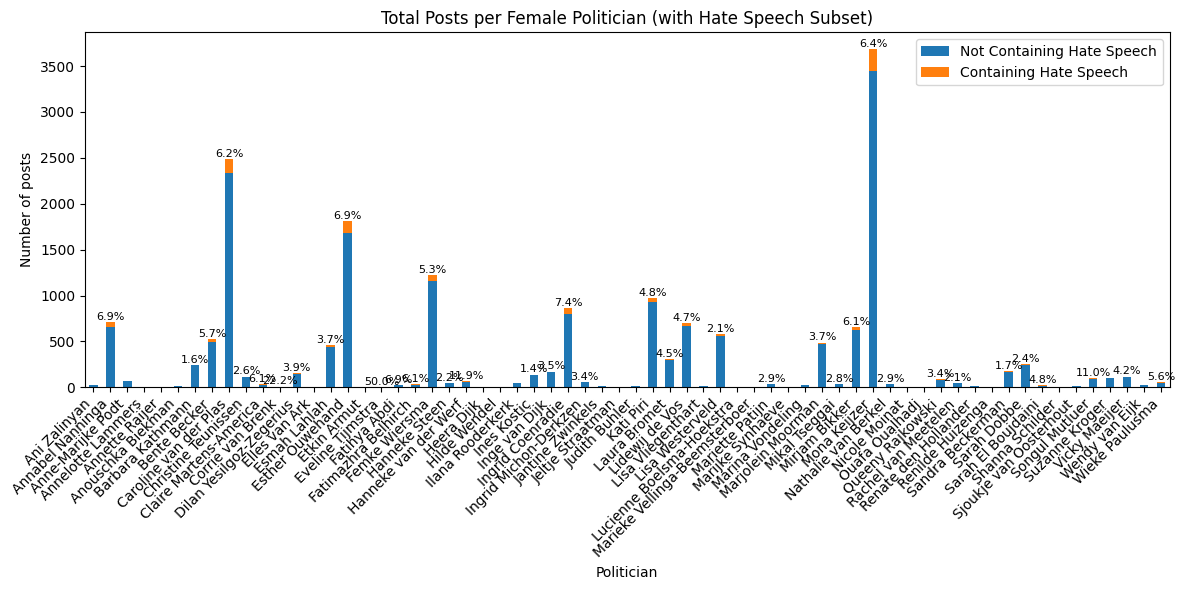

In [45]:
dataframe = pd.DataFrame(name_posts)

agg = dataframe.groupby("politician").agg(
    total_posts = ("text", "count"),
    hate_posts  = ("hate_speech", "sum")
)

agg["non_hate_posts"] = agg["total_posts"] - agg["hate_posts"]

ax = agg[["non_hate_posts", "hate_posts"]].plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6)
)

ax.legend(["Not Containing Hate Speech", "Containing Hate Speech"])

# Percentage labels above each bar
for i, (non_hate, hate) in enumerate(zip(agg['non_hate_posts'], agg['hate_posts'])):
    total = non_hate + hate
    if total > 0:
        pct = hate / total * 100
        if pct > 0.0:
            ax.text(
                i,
                total + 2,
                f"{pct:.1f}%",
                ha='center', va='bottom', fontsize=8, rotation=0
            )

ax.set_xlabel("Politician")
ax.set_ylabel("Number of posts")
ax.set_title("Total Posts per Female Politician (with Hate Speech Subset)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

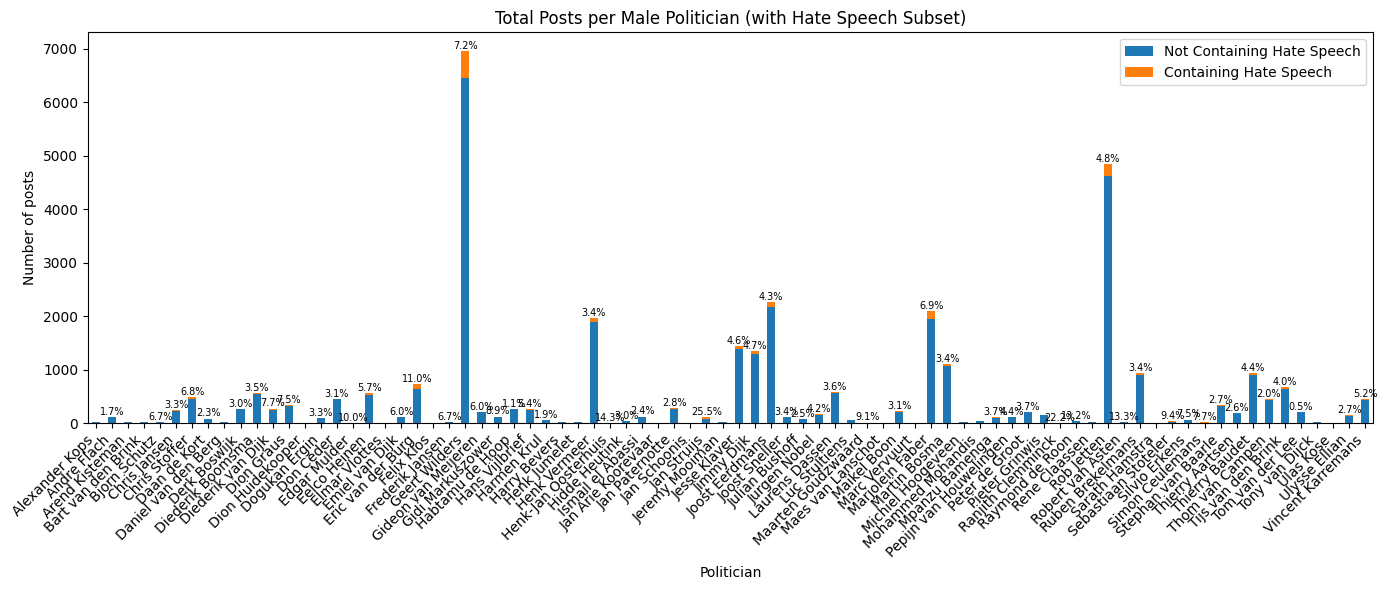

In [46]:
dataframe_male = pd.DataFrame(malepol_posts)

agg_male = dataframe_male.groupby("politician").agg(
    total_posts = ("text", "count"),
    hate_posts  = ("hate_speech", "sum")
)

agg_male["non_hate_posts"] = agg_male["total_posts"] - agg_male["hate_posts"]

ax = agg_male[["non_hate_posts", "hate_posts"]].plot(
    kind="bar",
    stacked=True,
    figsize=(14, 6)
)

ax.legend(["Not Containing Hate Speech", "Containing Hate Speech"])

# Percentage labels above each bar
for i, (non_hate, hate) in enumerate(zip(agg_male['non_hate_posts'], agg_male['hate_posts'])):
    total = non_hate + hate
    if total > 0:
        pct = hate / total * 100
        if pct > 0.0:
            ax.text(
                i,
                total + 2,
                f"{pct:.1f}%",
                ha='center', va='bottom', fontsize=7, rotation=0
            )

ax.set_xlabel("Politician")
ax.set_ylabel("Number of posts")
ax.set_title("Total Posts per Male Politician (with Hate Speech Subset)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

Bluesky variables:
- Female politicians: name_posts
- Male politicians: malepol_posts

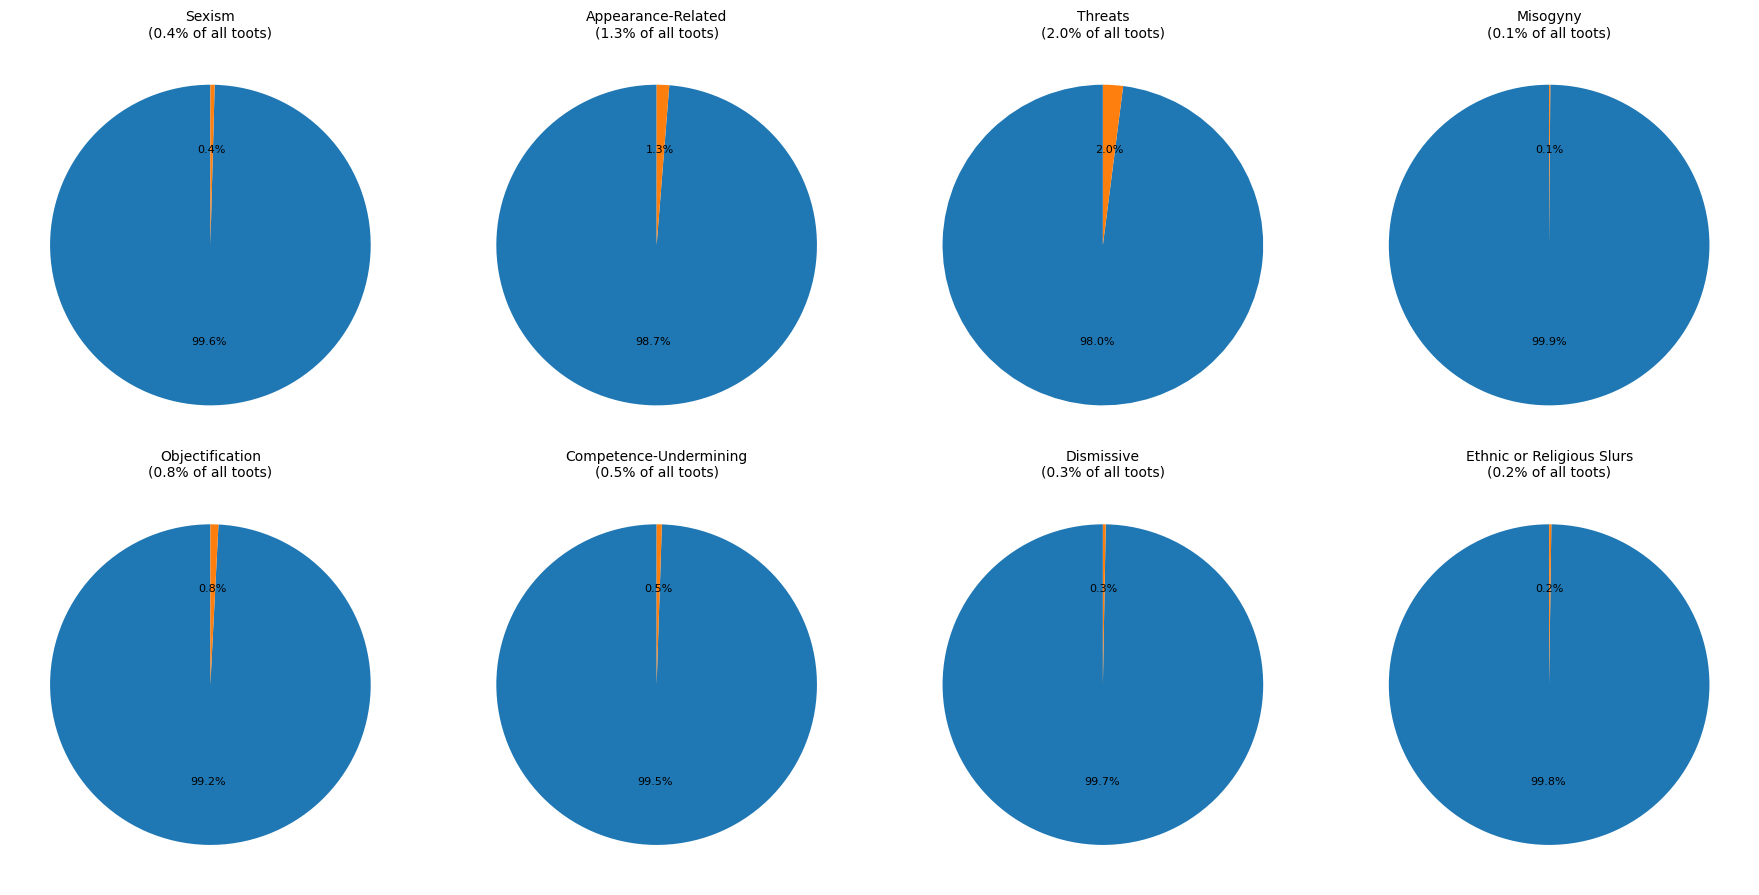

In [49]:
category_counts = {
    category: len([p for p in name_posts if category in p.get('hate_categories', [])])
    for category in hate_keywords.keys()
}

total_posts = len(name_posts)

colors = ["#1f77b4", "#ff7f0e"]   # [non-hate, hate]

pretty_labels = {
    "sexist": "Sexism",
    "appearance": "Appearance-Related",
    "threats": "Threats",
    "misogyny": "Misogyny",
    "objectification": "Objectification",
    "competence_undermining": "Competence-Undermining",
    "dismissive": "Dismissive",
    "ethnic_religious_slurs": "Ethnic or Religious Slurs"
}

fig, axes = plt.subplots(2, 4, figsize=(18, 9))
axes = axes.flatten()

for i, (category, count) in enumerate(category_counts.items()):
    ax = axes[i]

    hate_pct = (count / total_posts) * 100 if total_posts > 0 else 0
    sizes = [total_posts - count, count]

    ax.pie(
        sizes,
        colors=colors,
        autopct=lambda pct: f"{pct:.1f}%" if pct > 0 else "",
        startangle=90,
        textprops={'fontsize': 8}
    )

    ax.set_title(f"{pretty_labels[category]}\n({hate_pct:.1f}% of all toots)", fontsize=10)

plt.tight_layout()
plt.show()

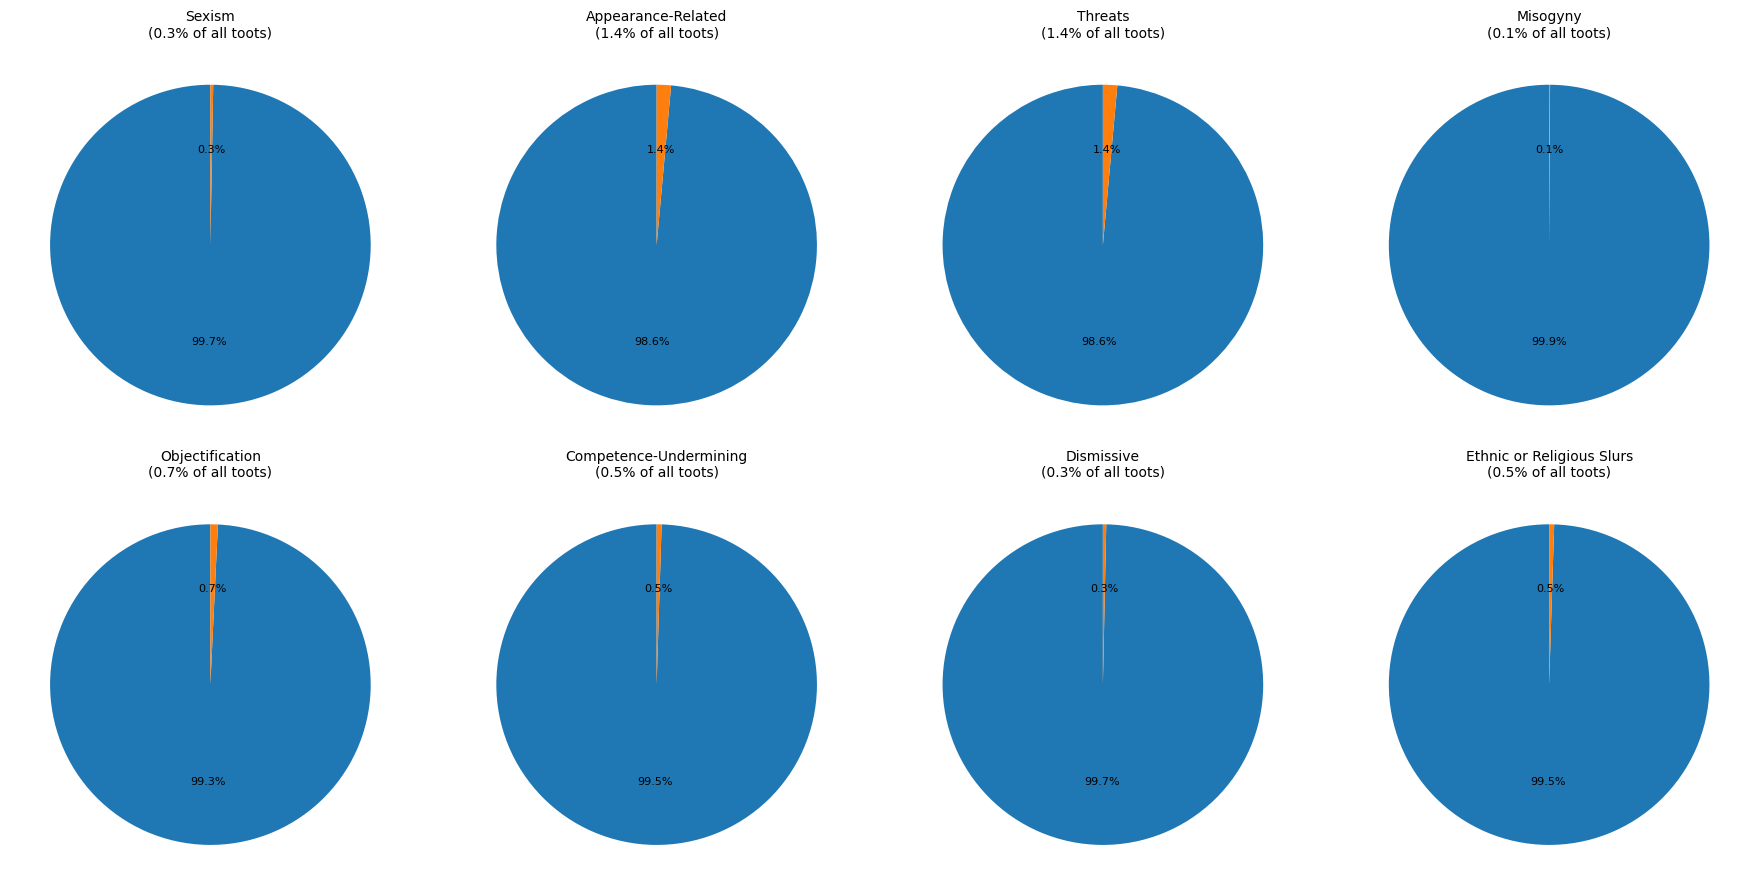

In [50]:
category_counts = {
    category: len([p for p in malepol_posts if category in p.get('hate_categories', [])])
    for category in hate_keywords.keys()
}

total_posts = len(malepol_posts)

colors = ["#1f77b4", "#ff7f0e"]   # [non-hate, hate]

pretty_labels = {
    "sexist": "Sexism",
    "appearance": "Appearance-Related",
    "threats": "Threats",
    "misogyny": "Misogyny",
    "objectification": "Objectification",
    "competence_undermining": "Competence-Undermining",
    "dismissive": "Dismissive",
    "ethnic_religious_slurs": "Ethnic or Religious Slurs"
}

fig, axes = plt.subplots(2, 4, figsize=(18, 9))
axes = axes.flatten()

for i, (category, count) in enumerate(category_counts.items()):
    ax = axes[i]

    hate_pct = (count / total_posts) * 100 if total_posts > 0 else 0
    sizes = [total_posts - count, count]

    ax.pie(
        sizes,
        colors=colors,
        autopct=lambda pct: f"{pct:.1f}%" if pct > 0 else "",
        startangle=90,
        textprops={'fontsize': 8}
    )

    ax.set_title(f"{pretty_labels[category]}\n({hate_pct:.1f}% of all toots)", fontsize=10)

plt.tight_layout()
plt.show()

In [52]:
blue = '#1f77b4'
orange = '#ff7f0e'

categories = list(hate_keywords.keys())

female_counts = {
    cat: len([p for p in name_posts if cat in p.get('hate_categories', [])])
    for cat in categories
}
female_total = len(name_posts)

male_counts = {
    cat: len([p for p in malepol_posts if cat in p.get('hate_categories', [])])
    for cat in categories
}
male_total = len(malepol_posts)

female_pct = {cat: female_counts[cat] / female_total * 100 for cat in categories}
male_pct   = {cat: male_counts[cat] / male_total   * 100 for cat in categories}

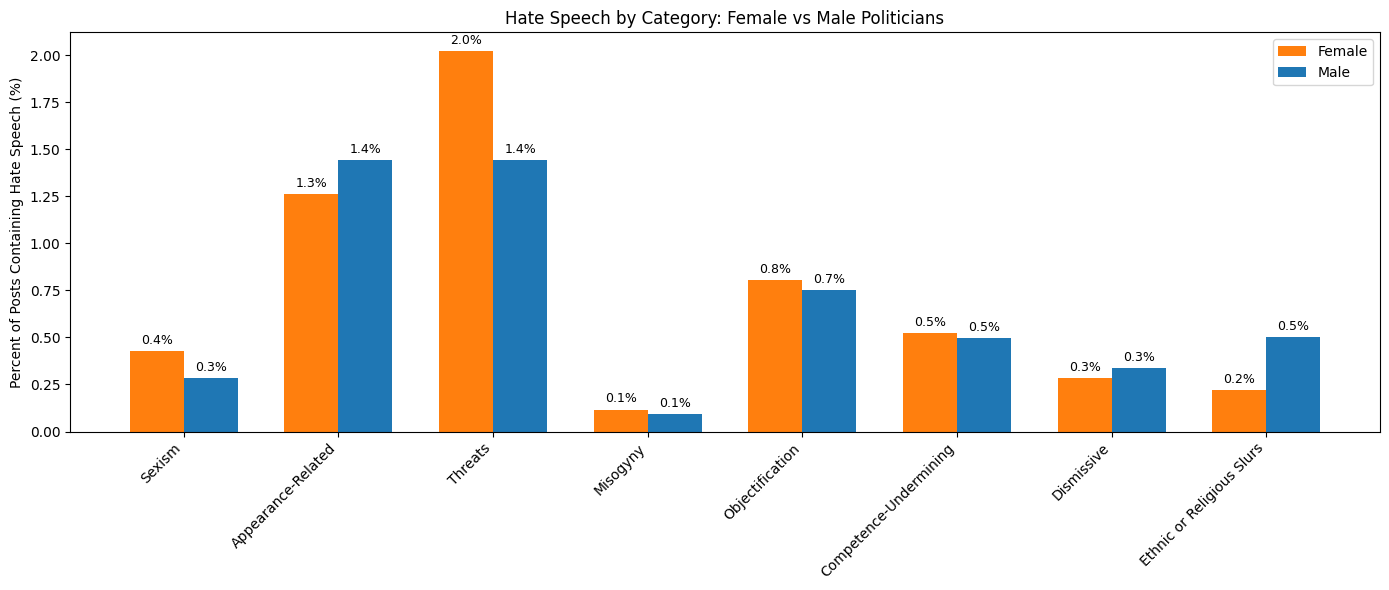

In [53]:
x = np.arange(len(categories))
width = 0.35

female_vals = [female_pct[c] for c in categories]
male_vals = [male_pct[c] for c in categories]

fig, ax = plt.subplots(figsize=(14, 6))

bars_f = ax.bar(x - width/2, female_vals, width, label="Female", color=orange)
bars_m = ax.bar(x + width/2, male_vals, width, label="Male", color=blue)

ax.set_xticks(x)
ax.set_xticklabels([pretty_labels[c] for c in categories], rotation=45, ha='right')
ax.set_ylabel("Percent of Posts Containing Hate Speech (%)")
ax.set_title("Hate Speech by Category: Female vs Male Politicians")
ax.legend()

# Add Percentage Labels
for bar in bars_f:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=9
    )

for bar in bars_m:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

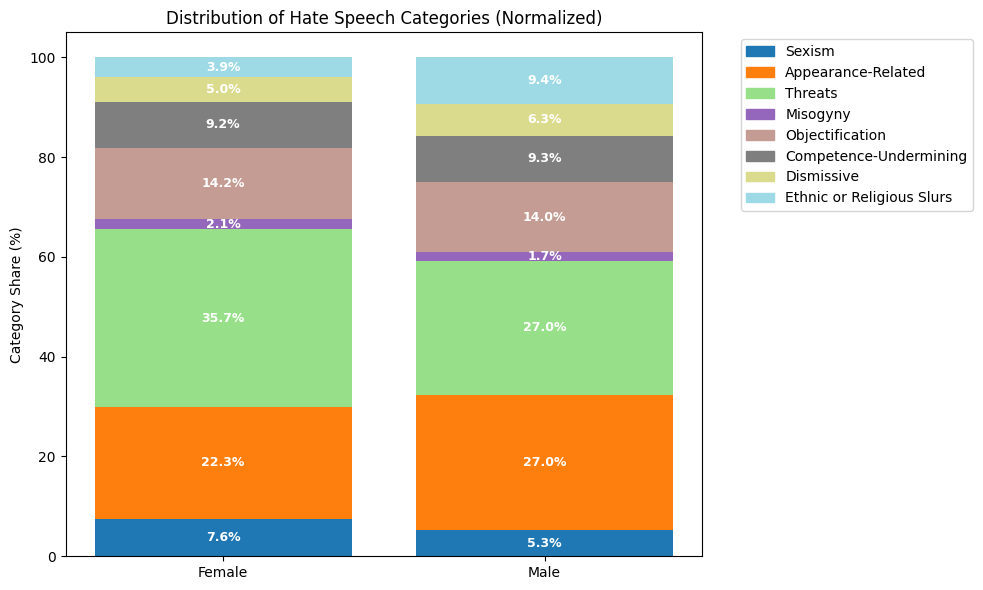

In [54]:
categories = list(hate_keywords.keys())

female_counts = {
    c: sum(c in p['hate_categories'] for p in name_posts)
    for c in categories
}
male_counts = {
    c: sum(c in p['hate_categories'] for p in malepol_posts)
    for c in categories
}

female_total = sum(female_counts.values())
male_total   = sum(male_counts.values())

female_pct = {c: (female_counts[c] / female_total * 100 if female_total else 0)
              for c in categories}
male_pct   = {c: (male_counts[c] / male_total * 100 if male_total else 0)
              for c in categories}

colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

fig, ax = plt.subplots(figsize=(10, 6))

bottom_f = 0
bottom_m = 0

for i, c in enumerate(categories):
    f_val = female_pct[c]
    m_val = male_pct[c]

    ax.bar("Female", f_val, bottom=bottom_f, color=colors[i])
    ax.bar("Male",   m_val, bottom=bottom_m, color=colors[i])

    if f_val > 1:
        ax.text(
            "Female",
            bottom_f + f_val / 2,
            f"{f_val:.1f}%",
            ha="center", va="center", fontsize=9, color="white", fontweight="bold"
        )
    if m_val > 1:
        ax.text(
            "Male",
            bottom_m + m_val / 2,
            f"{m_val:.1f}%",
            ha="center", va="center", fontsize=9, color="white", fontweight="bold"
        )

    bottom_f += f_val
    bottom_m += m_val

ax.set_ylabel("Category Share (%)")
ax.set_title("Distribution of Hate Speech Categories (Normalized)")

legend_patches = [
    plt.matplotlib.patches.Patch(color=colors[i], label=pretty_labels[c])
    for i, c in enumerate(categories)
]
ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

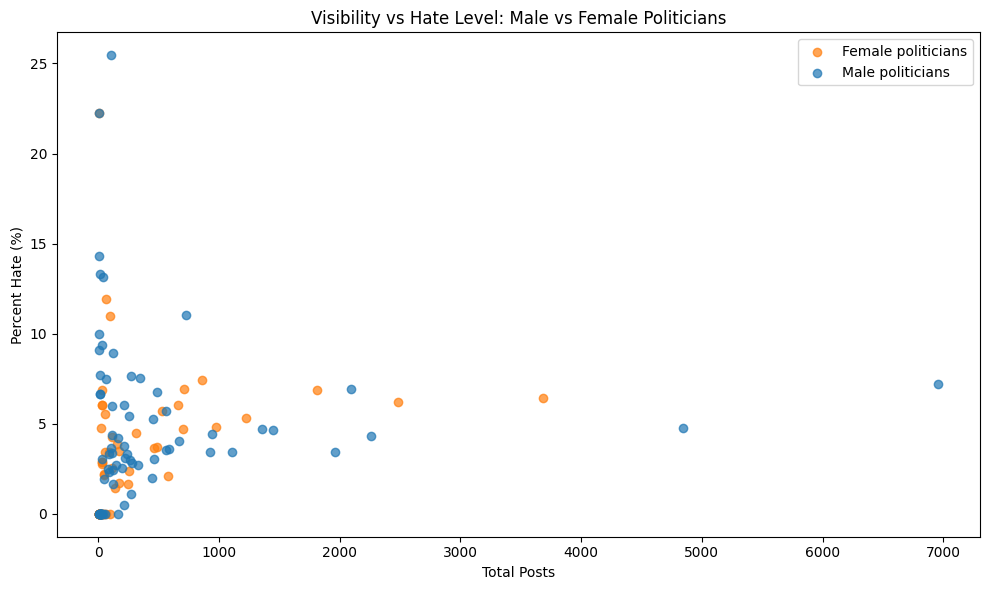

In [55]:
# Function to compute the hate rate of each politician
def compute_hate_rate(toots):
    poli_rates = {}
    for p in toots:
        pid = p["politician"]
        if pid not in poli_rates:
            poli_rates[pid] = {"total": 0, "hate": 0}
        poli_rates[pid]["total"] += 1
        if p["hate_speech"]:
            poli_rates[pid]["hate"] += 1

    return [
        (pid, data["total"], data["hate"] / data["total"] * 100)
        for pid, data in poli_rates.items()
        if data["total"] > 5  # filter tiny accounts
    ]

female_points = compute_hate_rate(name_posts)
male_points   = compute_hate_rate(malepol_posts)

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(
    [p[1] for p in female_points],
    [p[2] for p in female_points],
    color=orange,
    label="Female politicians",
    alpha=0.7
)

ax.scatter(
    [p[1] for p in male_points],
    [p[2] for p in male_points],
    color=blue,
    label="Male politicians",
    alpha=0.7
)

ax.set_xlabel("Total Posts")
ax.set_ylabel("Percent Hate (%)")
ax.set_title("Visibility vs Hate Level: Male vs Female Politicians")
ax.legend()

plt.tight_layout()
plt.show()

Statistical tests on Bluesky data.

In [56]:
# Step 1: Overall
female_total = len(name_posts)
female_hate = sum(1 for p in name_posts if p["hate_speech"])

male_total = len(malepol_posts)
male_hate = sum(1 for p in malepol_posts if p["hate_speech"])

# Two-proportion z-test
counts = np.array([female_hate, male_hate])
nobs = np.array([female_total, male_total])

zstat, p = proportions_ztest(count=counts, nobs=nobs)

print("z =", round(zstat, 5), ", p =", round(p, 5))

if p < 0.05:
    print("Significant difference\n")
else:
    print("Not significant\n")


# Step 2: Per Category

for category in hate_keywords.keys():
    female_cat = sum(1 for p in name_posts if category in p["hate_categories"])
    male_cat = sum(1 for p in malepol_posts if category in p["hate_categories"])

    f_total = female_total
    m_total = male_total

    contingency = np.array([[female_cat, f_total - female_cat], [male_cat,   m_total - male_cat]])

    # Fisher if any small category
    if female_cat < 5 or male_cat < 5:
        test_type = "Fisher"
        stat_value, pval = fisher_exact(contingency)
        print("Did fisher test for ", category)
        print("p value = ", pval)
        if pval < 0.05:
            print("Statistically significant difference for category ", category)
        else:
            print("No for ", category)
    else:
        count = np.array([female_cat, male_cat])
        nobs = np.array([f_total, m_total])
        test_type = "Z-test"
        stat_value, pval = proportions_ztest(count, nobs)
        print("Did z-test for ", category)
        print("p value = ", pval)
        if pval < 0.05:
            print("Statistically significant difference for category ", category)
        else:
            print("No for ", category)

z = 1.3817 , p = 0.16706
Not significant

Did z-test for  sexist
p value =  0.0066436591947249615
Statistically significant difference for category  sexist
Did z-test for  appearance
p value =  0.09003844370024845
No for  appearance
Did z-test for  threats
p value =  7.115771157042337e-07
Statistically significant difference for category  threats
Did z-test for  misogyny
p value =  0.4120994244813033
No for  misogyny
Did z-test for  objectification
p value =  0.49284339645908404
No for  objectification
Did z-test for  competence_undermining
p value =  0.714871645013394
No for  competence_undermining
Did z-test for  dismissive
p value =  0.3079093490961665
No for  dismissive
Did z-test for  ethnic_religious_slurs
p value =  1.4820924706891527e-06
Statistically significant difference for category  ethnic_religious_slurs


We do get some statistically significant differences for Bluesky!
1. Female politicians experienced significantly more sexism-related hate speech.
2. Female politicians experienced significantly more threat-related hate speech.
3. Male politicians experienced significantly more hate speech containing ethnic or religious slurs.

### Part 3: Compare Mastodon and Bluesky

In [66]:
# Overall for female
mast_f_total = len(name_toots)
mast_f_hate = sum(1 for p in name_toots if p["hate_speech"])

blue_f_total = len(name_posts)
blue_f_hate = sum(1 for p in name_posts if p["hate_speech"])

counts = np.array([mast_f_hate, blue_f_hate])
nobs = np.array([mast_f_total, blue_f_total])

if mast_f_hate < 5 or blue_f_hate < 5:
    contingency = np.array([[mast_f_hate, mast_f_total - mast_f_hate], [blue_f_hate, blue_f_total - blue_f_hate]])
    stat_value, pval = fisher_exact(contingency)
    print("Female Overall: Fisher's")
else:
    stat_value, pval = proportions_ztest(counts, nobs)
    print("Female Overall: Z-test")

print("stat =", stat_value)
print("p =", pval)
if pval < 0.05:
    print("STAT SIG for F OVERALL \n")


## Overall for male
mast_m_total = len(malepol_toots)
mast_m_hate = sum(1 for p in malepol_toots if p["hate_speech"])

blue_m_total = len(malepol_posts)
blue_m_hate = sum(1 for p in malepol_posts if p["hate_speech"])

counts = np.array([mast_m_hate, blue_m_hate])
nobs = np.array([mast_m_total, blue_m_total])

if mast_m_hate < 5 or blue_m_hate < 5:
    contingency = np.array([[mast_m_hate, mast_m_total - mast_m_hate], [blue_m_hate, blue_m_total - blue_m_hate]])
    mstat_value, mpval = fisher_exact(contingency)
    print("Male Overall: Fisher's")
else:
    mstat_value, mpval = proportions_ztest(counts, nobs)
    print("Male Overall: Z-test")

print("stat =", mstat_value)
print("p =", mpval)
if mpval < 0.05:
    print("STAT SIG for M OVERALL \n")


## Per category and gender
for category in hate_keywords.keys():

    print("Category: ", category)

    mast_f_cat = sum(1 for p in name_toots if category in p["hate_categories"])
    blue_f_cat = sum(1 for p in name_posts if category in p["hate_categories"])

    mast_m_cat = sum(1 for p in malepol_toots if category in p["hate_categories"])
    blue_m_cat = sum(1 for p in malepol_posts if category in p["hate_categories"])

    if mast_f_cat < 5 or blue_f_cat < 5:
        contingency = np.array([[mast_f_cat, mast_f_total - mast_f_cat], [blue_f_cat, blue_f_total - blue_f_cat]])
        f_stat, f_p = fisher_exact(contingency)
        f_test = "Fisher"
        print("female: using Fisher")
    else:
        counts = np.array([mast_f_cat, blue_f_cat])
        nobs = np.array([mast_f_total, blue_f_total])
        f_stat, f_p = proportions_ztest(counts, nobs)
        f_test = "Z-test"
        print("female: using Z-test")

    print("Female, ", category, ": p value = ", f_p)
    if f_p < 0.05:
        print("STAT SIG for F, ", category, "\n")

    if mast_m_cat < 5 or blue_m_cat < 5:
        contingency = np.array([[mast_m_cat, mast_m_total - mast_m_cat], [blue_m_cat, blue_m_total - blue_m_cat]])
        m_stat, m_p = fisher_exact(contingency)
        m_test = "Fisher"
        print("male: using Fisher")
    else:
        counts = np.array([mast_m_cat, blue_m_cat])
        nobs = np.array([mast_m_total, blue_m_total])
        m_stat, m_p = proportions_ztest(counts, nobs)
        m_test = "Z-test"
        print("male: using Z-test")

    print("Male, ", category, ": p value = ", m_p)
    if m_p < 0.05:
        print("STAT SIG for M, ", category, "\n")

    print("\n")

Female Overall: Z-test
stat = 3.2996625854912893
p = 0.0009680113716598528
STAT SIG for F OVERALL 

Male Overall: Z-test
stat = 4.896373963051679
p = 9.76212104483726e-07
STAT SIG for M OVERALL 

Category:  sexist
female: using Z-test
Female,  sexist : p value =  0.4026781071616784
male: using Z-test
Male,  sexist : p value =  0.7403276842171975


Category:  appearance
female: using Z-test
Female,  appearance : p value =  0.007777244021293738
STAT SIG for F,  appearance 

male: using Z-test
Male,  appearance : p value =  0.041881646755657045
STAT SIG for M,  appearance 



Category:  threats
female: using Z-test
Female,  threats : p value =  0.003272623503488897
STAT SIG for F,  threats 

male: using Z-test
Male,  threats : p value =  4.40685517329116e-07
STAT SIG for M,  threats 



Category:  misogyny
female: using Fisher
Female,  misogyny : p value =  0.0968236601532902
male: using Fisher
Male,  misogyny : p value =  1.0


Category:  objectification
female: using Z-test
Female,  obj

These statistical tests reveal that we see significantly different trends in hate speech on Mastodon versus Bluesky.

We can visualize with more plots. First, for female.

In [72]:
blue = '#1f77b4'
orange = '#ff7f0e'

categories = list(hate_keywords.keys())

fmast_counts = {
    cat: len([p for p in name_toots if cat in p.get('hate_categories', [])])
    for cat in categories
}
fmast_total = len(name_toots)

fblue_counts = {
    cat: len([p for p in name_posts if cat in p.get('hate_categories', [])])
    for cat in categories
}
fblue_total = len(name_posts)

mast_f_hate_total = sum(1 for p in name_toots if p["hate_speech"])
blue_f_hate_total = sum(1 for p in name_posts if p["hate_speech"])

fmast_pct = {
    cat: fmast_counts[cat] / mast_f_hate_total * 100
    for cat in categories
}

fblue_pct = {
    cat: fblue_counts[cat] / blue_f_hate_total * 100
    for cat in categories
}

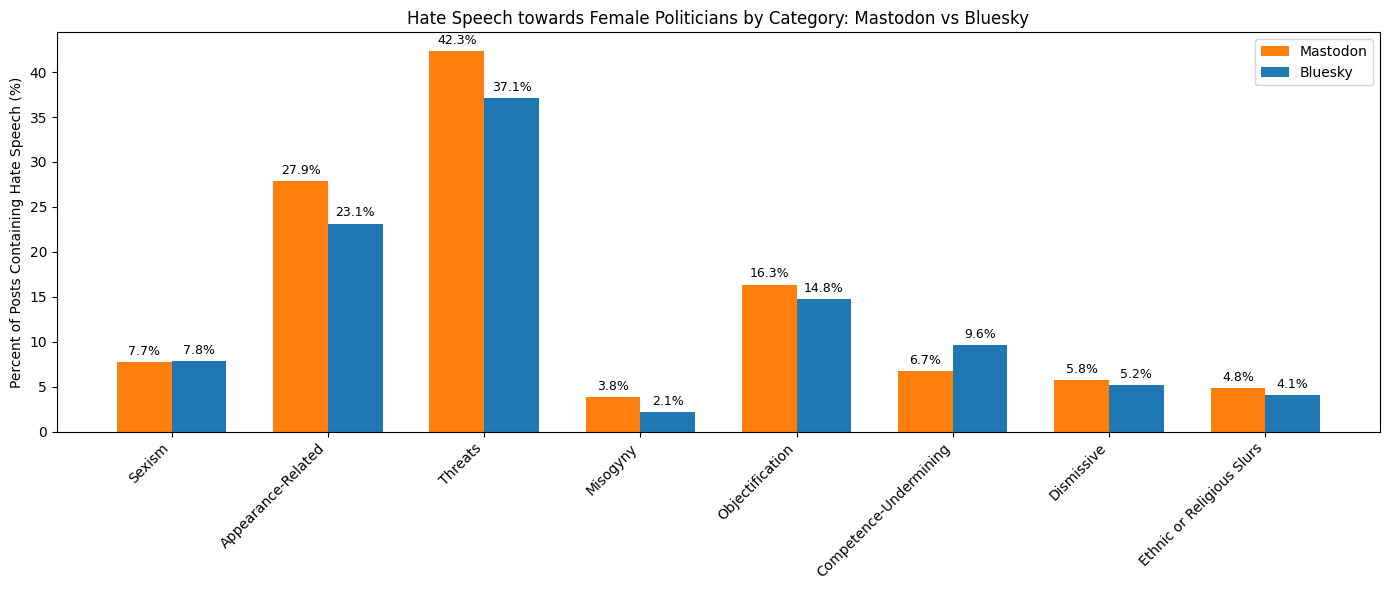

In [73]:
x = np.arange(len(categories))
width = 0.35

fmast_vals = [fmast_pct[c] for c in categories]
fblue_vals = [fblue_pct[c] for c in categories]

fig, ax = plt.subplots(figsize=(14, 6))

bars_f = ax.bar(x - width/2, fmast_vals, width, label="Mastodon", color=orange)
bars_m = ax.bar(x + width/2, fblue_vals, width, label="Bluesky", color=blue)

ax.set_xticks(x)
ax.set_xticklabels([pretty_labels[c] for c in categories], rotation=45, ha='right')
ax.set_ylabel("Percent of Posts Containing Hate Speech (%)")
ax.set_title("Hate Speech towards Female Politicians by Category: Mastodon vs Bluesky")
ax.legend()

# Add Percentage Labels
for bar in bars_f:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=9
    )

for bar in bars_m:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

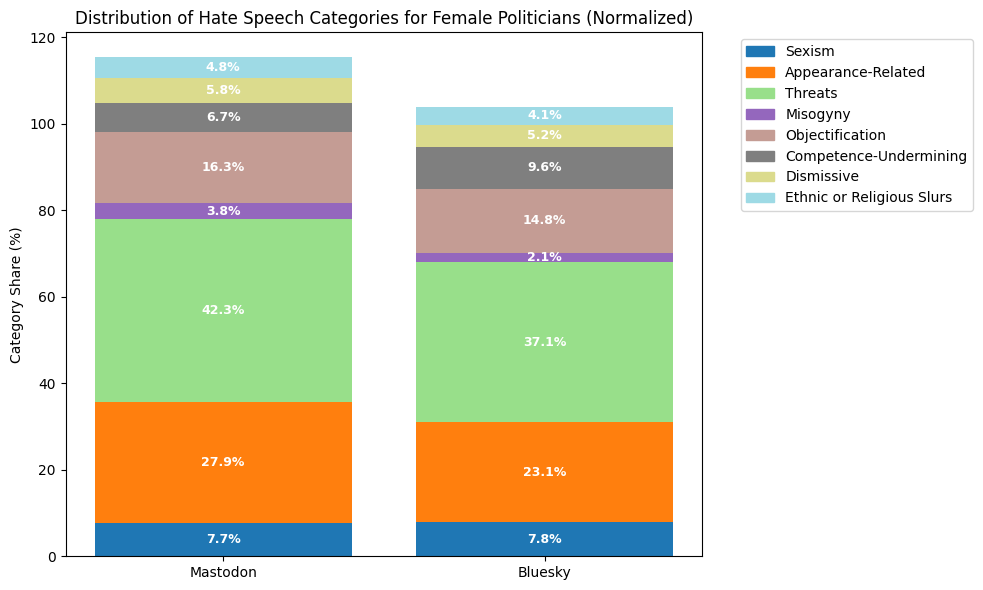

In [74]:
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

fig, ax = plt.subplots(figsize=(10, 6))

bottom_f = 0
bottom_m = 0

for i, c in enumerate(categories):
    f_val = fmast_pct[c]
    m_val = fblue_pct[c]


    ax.bar("Mastodon", f_val, bottom=bottom_f, color=colors[i])
    ax.bar("Bluesky",   m_val, bottom=bottom_m, color=colors[i])

    if f_val > 1:
        ax.text(
            "Mastodon",
            bottom_f + f_val / 2,
            f"{f_val:.1f}%",
            ha="center", va="center", fontsize=9, color="white", fontweight="bold"
        )
    if m_val > 1:
        ax.text(
            "Bluesky",
            bottom_m + m_val / 2,
            f"{m_val:.1f}%",
            ha="center", va="center", fontsize=9, color="white", fontweight="bold"
        )

    bottom_f += f_val
    bottom_m += m_val

ax.set_ylabel("Category Share (%)")
ax.set_title("Distribution of Hate Speech Categories for Female Politicians (Normalized)")

legend_patches = [
    plt.matplotlib.patches.Patch(color=colors[i], label=pretty_labels[c])
    for i, c in enumerate(categories)
]
ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

We can do the same for Male Politicians.

In [75]:
blue = '#1f77b4'
orange = '#ff7f0e'

categories = list(hate_keywords.keys())

mmast_counts = {
    cat: len([p for p in malepol_toots if cat in p.get('hate_categories', [])])
    for cat in categories
}
mmast_total = len(malepol_toots)

mblue_counts = {
    cat: len([p for p in malepol_posts if cat in p.get('hate_categories', [])])
    for cat in categories
}
mblue_total = len(malepol_posts)

mast_m_hate_total = sum(1 for p in malepol_toots if p["hate_speech"])
blue_m_hate_total = sum(1 for p in malepol_posts if p["hate_speech"])

mmast_pct = {
    cat: mmast_counts[cat] / mast_m_hate_total * 100
    for cat in categories
}

mblue_pct = {
    cat: mblue_counts[cat] / blue_m_hate_total * 100
    for cat in categories
}

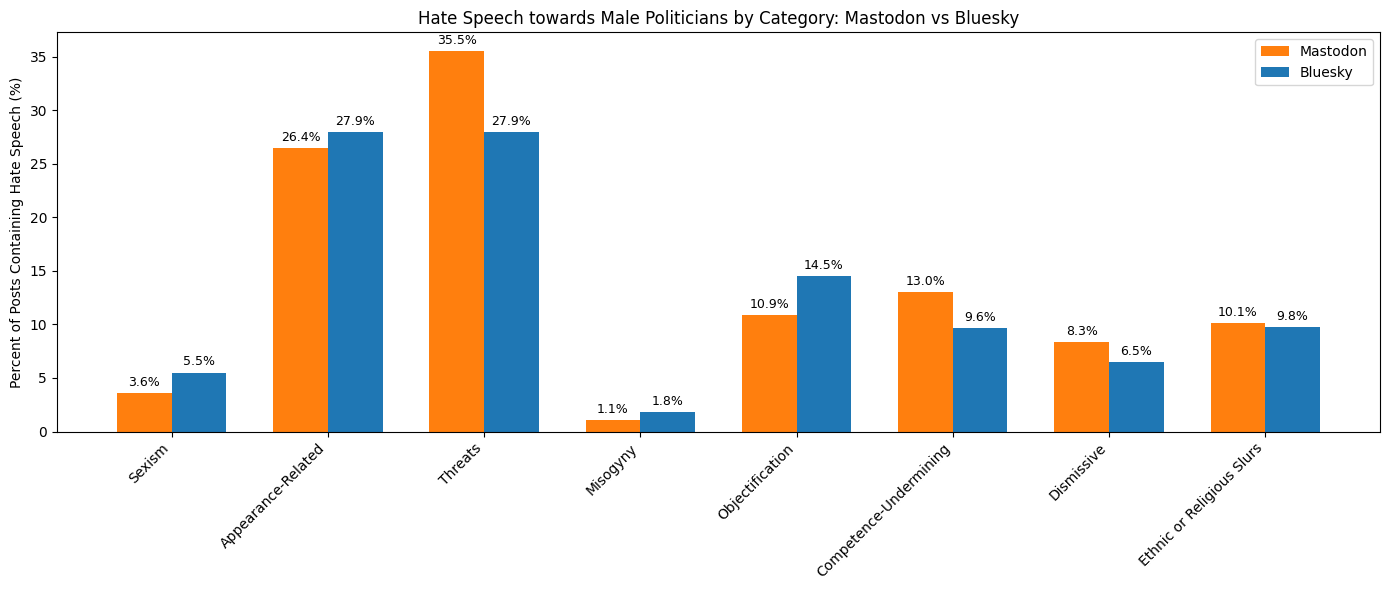

In [76]:
x = np.arange(len(categories))
width = 0.35

mmast_vals = [mmast_pct[c] for c in categories]
mblue_vals = [mblue_pct[c] for c in categories]

fig, ax = plt.subplots(figsize=(14, 6))

bars_f = ax.bar(x - width/2, mmast_vals, width, label="Mastodon", color=orange)
bars_m = ax.bar(x + width/2, mblue_vals, width, label="Bluesky", color=blue)

ax.set_xticks(x)
ax.set_xticklabels([pretty_labels[c] for c in categories], rotation=45, ha='right')
ax.set_ylabel("Percent of Posts Containing Hate Speech (%)")
ax.set_title("Hate Speech towards Male Politicians by Category: Mastodon vs Bluesky")
ax.legend()

# Add Percentage Labels
for bar in bars_f:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=9
    )

for bar in bars_m:
    height = bar.get_height()
    ax.annotate(
        f'{height:.1f}%',
        xy=(bar.get_x() + bar.get_width()/2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()

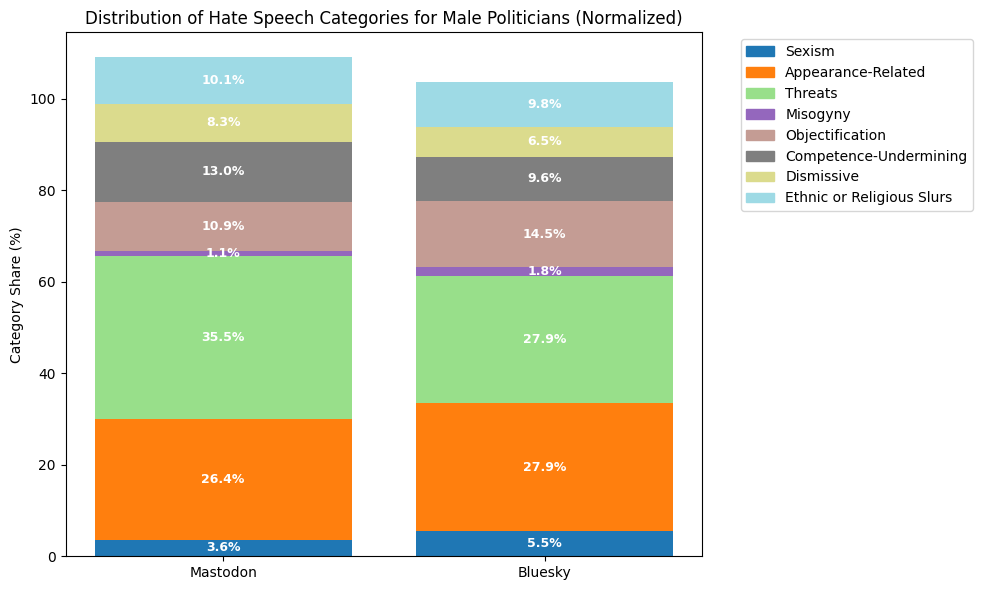

In [77]:
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

fig, ax = plt.subplots(figsize=(10, 6))

bottom_f = 0
bottom_m = 0

for i, c in enumerate(categories):
    f_val = mmast_pct[c]
    m_val = mblue_pct[c]


    ax.bar("Mastodon", f_val, bottom=bottom_f, color=colors[i])
    ax.bar("Bluesky",   m_val, bottom=bottom_m, color=colors[i])

    if f_val > 1:
        ax.text(
            "Mastodon",
            bottom_f + f_val / 2,
            f"{f_val:.1f}%",
            ha="center", va="center", fontsize=9, color="white", fontweight="bold"
        )
    if m_val > 1:
        ax.text(
            "Bluesky",
            bottom_m + m_val / 2,
            f"{m_val:.1f}%",
            ha="center", va="center", fontsize=9, color="white", fontweight="bold"
        )

    bottom_f += f_val
    bottom_m += m_val

ax.set_ylabel("Category Share (%)")
ax.set_title("Distribution of Hate Speech Categories for Male Politicians (Normalized)")

legend_patches = [
    plt.matplotlib.patches.Patch(color=colors[i], label=pretty_labels[c])
    for i, c in enumerate(categories)
]
ax.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Conclusions between Mastodon and Bluesky:
1. Mastodon toots contained significantly more hate speech towards female politicians overall than Bluesky posts.
2. Mastodon toots contained significantly more hate speech towards male politicians overall than Bluesky posts.
3. Mastodon toots contained significantly more hate speech towards female politicians regarding appearance than Bluesky posts.
4. Bluesky posts contained significantly more hate speech towards male politicians regarding appearance than Mastodon toots.
5. Mastodon toots contained significantly more hate speech towards female politicians containing threats than Bluesky posts.
6. Mastodon toots contained significantly more hate speech towards male politicians containing threats than Bluesky posts.
7. Mastodon toots contained significantly more hate speech towards male politicians that undermined competence than Bluesky posts.
8. Mastodon toots contained significantly more hate speech towards male politicians that were dismissive than Bluesky posts.